# Сборный проект

**Цель проекта:** выявить закономерности, определяющие успешность игры, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

План работы:
1. Подключить необходимые библиотеки для работы
2. Изучить общую информацию о наборе данных:
    * загрузить файлы
    * посмотреть количество данных, их тип, пропущенные значения, дубликаты, название столбцов
    * оценить распределение данных и сделать предварительные выводы о корректности данных
    * сделать вывод
3. Провести предварительную обработку данных:
    * переименовать столбцы в соответствии с правилами
    * обработать пропуски
    * изменить тип данных
    * обработать дубликаты
    * создать новые столбцы
    * сделать вывод
4. Провести исследовательский анализ данных:
    * сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    * как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    * выбрать актуальный период данных, которые помогут построить прогноз на 2017 год.
    * определить платформы, которые лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
    * построить боксплоты по глобальным продажам игр в разбивке по платформам. Описать результат.
    * определить взаимосвязь между продажами внутри одной популярной платформы и отзывами пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы. Соотнести выводы с продажами игр на других платформах.
    * построить общее распределение игр по жанрам, определить самые прибыльные жанры, выделяются ли жанры с высокими и низкими продажами?
    * сделать вывод
5. Составить портрет пользователя каждого региона:
    * Определите для пользователя каждого региона (NA, EU, JP):
        * Самые популярные платформы (топ-5). Опишите различия в долях продаж.
        * Самые популярные жанры (топ-5). Поясните разницу.
        * Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    * сделать вывод
6. Проверить статистические гипотезы:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
7. Написать общий вывод

Данные для анализа  получены из открытых источников доступны, в них содержатся исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

In [1]:
#подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial, sqrt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

#### Шаг 1. Загрузка данных

In [2]:
try:
    df = pd.read_csv('dataset.csv')
except:
    df = pd.read_csv('https://dataset.csv')

In [3]:
#посмотрим на данные
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#изучим общую информацию о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Найдем количество пропусков в столбцах
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Name                0.011965
Genre               0.011965
Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
dtype: float64

In [6]:
#посмотрим количество явных дубликатов в наборе данных
df.duplicated().sum()

0

В таблице данных 11 столбцов и 16715 строк. 6 столбцов имеют тип данных float64, 5 - object. Названия столбцов не соответствуют змеиному регистру (заглавные буквы). Также в некоторых столбцах имеются пропуски: причем в трех из них довольно много, больше 40%, нужно посмотреть, как их лучше обработать. Year_of_Release можно привести к типу int, но нужно учесть, что в этом столбце есть пропущенные значения. 

Явных дубликатов в таблице данных нет.

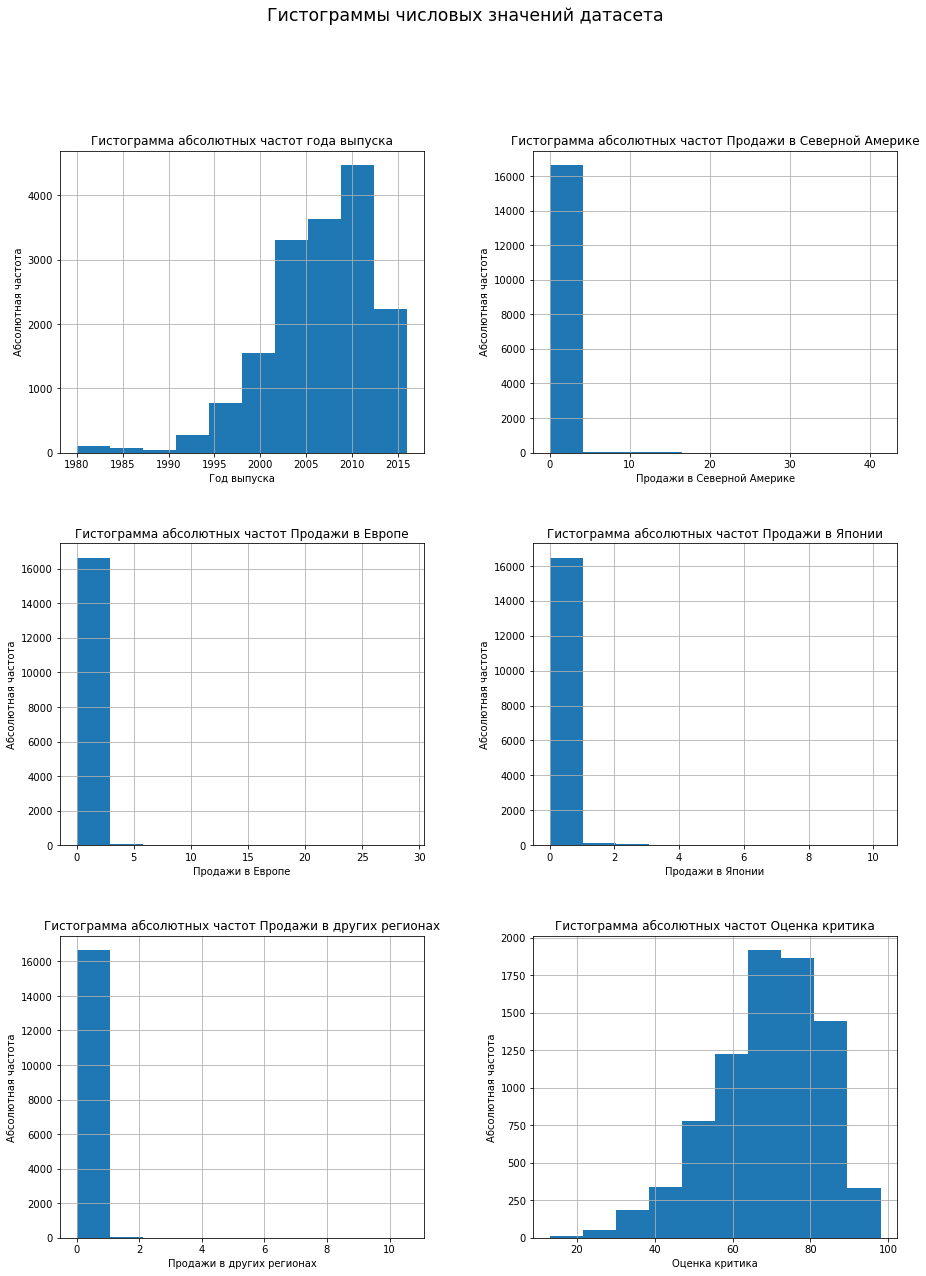

In [7]:
# гистограммы числовых значений датасета
axes = df.hist(figsize = (15,20))
axes[0,0].set_title('Гистограмма абсолютных частот года выпуска')
axes[0,0].set_xlabel('Год выпуска')
axes[0,0].set_ylabel('Абсолютная частота')

axes[0,1].set_title('Гистограмма абсолютных частот Продажи в Северной Америке')
axes[0,1].set_xlabel('Продажи в Северной Америке')
axes[0,1].set_ylabel('Абсолютная частота')

axes[1,0].set_title('Гистограмма абсолютных частот Продажи в Европе')
axes[1,0].set_xlabel('Продажи в Европе')
axes[1,0].set_ylabel('Абсолютная частота')

axes[1,1].set_title('Гистограмма абсолютных частот Продажи в Японии')
axes[1,1].set_xlabel('Продажи в Японии')
axes[1,1].set_ylabel('Абсолютная частота')

axes[2,0].set_title('Гистограмма абсолютных частот Продажи в других регионах')
axes[2,0].set_xlabel('Продажи в других регионах')
axes[2,0].set_ylabel('Абсолютная частота')

axes[2,1].set_title('Гистограмма абсолютных частот Оценка критика')
axes[2,1].set_xlabel('Оценка критика')
axes[2,1].set_ylabel('Абсолютная частота')


plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show()

Визуализация численных столбцов не выявила аномальных данных для них.

#### Шаг 2. Предобработка данных

In [8]:
#приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [9]:
len(df['name'].unique())

11560

In [10]:
df['name'].duplicated().sum()

5155

Наиболее вероятным выглядит наличие неявных дубликатов в столбцах name, genre и platform. Проверка на уникальность показала, что уникальных имен в name 11559, значит, есть повторы (явные дубликаты). Среди 11559 имен искать случайно повторяющиеся довольно сложно. Посмотрим остальные текстовые переменные.

In [11]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [12]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

В столбцах genre и platform неявных дубликатов нет. 

Посмотрим на наличие дубликатов в строках сразу по трем столбцам - название, платформа и год выпуска.

In [13]:
df[df[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Таких строк две, одна из них Madden NFL 13, посмотрим на нее подробно.

In [14]:
df.loc[(df['name']=='Madden NFL 13') & (df['platform']=='PS3')& (df['year_of_release']==2012.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Простой поиск в интернете по данной игре позволяет судить о том, что нужно оставить строку 604, так как продажи в NA регионе были. Строку 16230 удалим.

Вторую совпадение просматривать не буду, так как далее эти строки я и вовсе буду удалять из-за наличия в них пропусков.

In [15]:
df = df.drop(index=16230).reset_index(drop=True)
df.info()
df.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16709,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16710,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16711,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16712,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16713,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Работа с пропусками

In [16]:
#пропуски в name
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки с пропущенными названиями и жанром, восстановить их не продоставляется возможным. Поэтому удалим эти строки из датафрейма.

Пропуски в этих столбцах могут быть вызваны технической ошибкой при сборе информации, или, например, название игры было написано не латиницей.

In [17]:
df = df.dropna(subset=['name', 'genre'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [18]:
#пропуски в год выпуска игры
df['year_of_release'].isna().sum()

269

В таблице 269 пропущенных значений по столбцу год выпуска, поэтому сразу к типу int привести нельзя. Поскольку таких пропусков всего 1.6%, а одной из задач заказчика является выявление срока жизни платформы на рынке, то чтобы не искажать данные, просто удалим эти строки.

Пропуски в этом столбце могут быть вызваны технической ошибкой при сборе информации.

In [19]:
df = df.dropna(subset=['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [20]:
df['year_of_release'].isna().sum()

0

Пропуски в оценке от пользователей и от критиков могут быть обусловлено процедурой оценивания: игра еще не успела набрать достаточное количество отзывов, либо игры в принципе не оценивались, так как они вышли довольно давно и не было практики оценивания игр критиками и сервисов для оценки пользователями. 

In [21]:
#пропуски в оценке от пользователей
df.loc[df['user_score'].isna(),]['year_of_release'].describe()

count    6605.000000
mean     2004.782892
std         7.474534
min      1980.000000
25%      1999.000000
50%      2007.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

Можно было бы предположить, что оценка от пользователей отсутствует только для старых игр, но оказалось, что это не так. Тем не менее, 75% всех пропусков до 2010 года, а ввиду того, что мы будем определять актуальный период и эти года, скорее всего, будут не включены в него.

In [22]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [23]:
df.loc[df['user_score']=='0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


В данном столбце присутствует аббревиатура tbd, что означает, что рейтинг для этой игры еще не определен или вовсе не определялся. Поскольку в таблице присутствует 0, то это значение нельзя заменить нулем, заменим их -1, чтобы привести столбец далее к нужному типу данных. Также поступим и с nan. Пропуски и tbd не заменяем какой-либо метрикой потому, что данный показатель - субъективная оценка, в связи с чем ее трудно предугадать одной статистикой. 

In [24]:
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'].isna().sum()

0

In [25]:
df.loc[df['user_score']=='tbd', 'user_score'] = -1

In [26]:
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Поскольку оценка критиком также является субъективным показателем, то заменим пропуски также -1, просто для индикации этого параметра.

In [27]:
#замена пропусков в critic_score
df['critic_score'] = df['critic_score'].fillna(-1)
df['critic_score'].isna().sum()

0

Поскольку рейтинг ESRB определяется для игр в Северной Америке, то для некоторых игр, которые выпускаются для EU регионов, JP или других регионов этот рейтинг будет отсутствовать. По этой причине просто отметим все пропуски 'no rating'.

In [28]:
#замена пропусков в rating
df['rating'] = df['rating'].fillna('no rating')
df['rating'].isna().sum()   

0

In [29]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,no rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,no rating


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Изменение типов данных

In [31]:
#замена типа данных столбца оценка пользователя
df['user_score'] = df['user_score'].astype('float64')

In [32]:
#замена типа данных столбца оценка пользователя
df['year_of_release'] = df['year_of_release'].astype('int64')

Создание нового столбца

In [33]:
#создание столбца, суммирующего все продажи
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16713
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод:**
* Были обработаны пропуски:
    * в столбцах name и genre были две (одни и те же) строки с пропущенными значениями, было решено их удалить ввиду невозможности восстановления данных.
    * в столбце year_of_release  строки с пропусками также были удалены, чтобы не искажать результаты дальнейшего анализа.
    * в столбцах critic_score и user_score пропуски были оставлены, только заменены на индикаторное значение -1, для удобства работы в дальнейшем с этими данными. Данные было решено не заполнять какой-либо статистикой, так как это субъективная оценка. tbd в столбце user_score также было заменено на -1, поскольку фактически это тот же nan.
    * в столбце rating пропуски также заменены индикатором -1, поскольку отсутствие рейтинга для некоторых игр обусловлено определением ESRB - он определяется только для игр NA региона.
* Были изменены типы столбцов: user_score - float, year_of_release - int.
* Был добавлен новый столбец, суммирующий все продажи игры.  
* В таблице нет дубликатов.
    </span>

In [34]:
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
    print('-'* 25)
    print(col_l, temp[col_l].sort_values().unique())
    print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16713
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

#### Исследовательский анализ данных

In [35]:
#количество игр по годам выпуска
years_games = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count')
years_games = years_games.rename(columns={'name': 'count'})
years_games

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


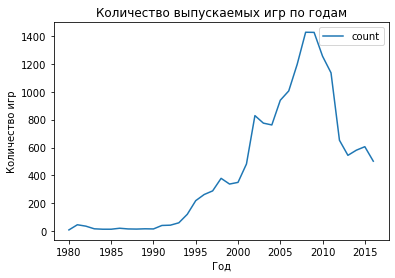

In [36]:
years_games.plot()
plt.title('Количество выпускаемых игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр');

С 1980 до 1994 год в количестве выпускаемых игр нет тенденции, их количество то уменьшается, то увеличивается. В 1994 году количество выпускаемых игр удваивается и с этого времени до 2008 года рынок стабильно растет, что может быть вызвано появлением всемирной паутины, появлением новых технологий, развитием графического дизайна игр, появлением игровых платформ, ростом интереса пользователя.
С 2008 года идет спад количества выпускаемых игр, в первую очередь вызванный экономическим кризисом. Кроме того, с этого времени начинается широкое распространение смартфонов и, как следствие, мобильных игр.

В связи с этим для дальнейшего анализа мы, скорее всего, будем пользоваться данными за последние 5 лет.

In [37]:
#сумммарные продажи по платформам
platforms_sales = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc='sum')
platforms_sales = platforms_sales.sort_values(by='total_sales', ascending=False)
platforms_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


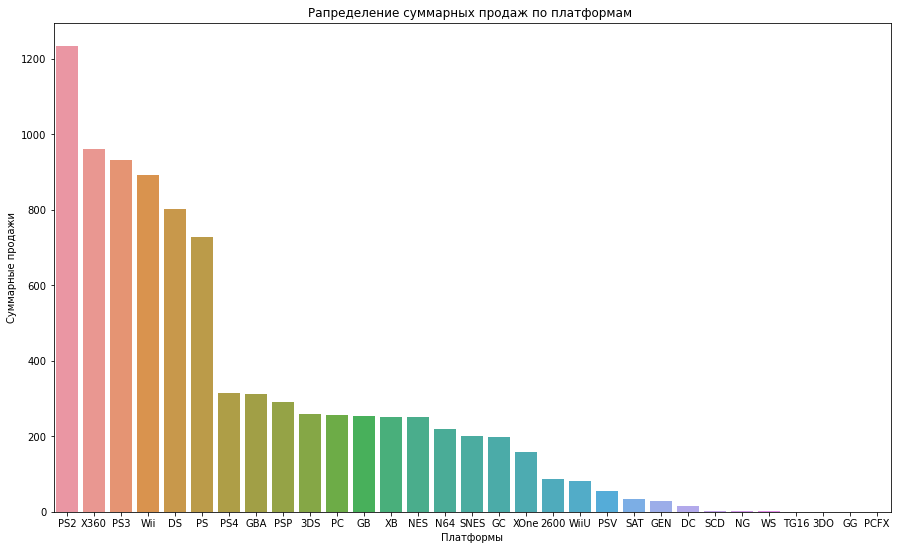

In [38]:
#график распределения суммарных продаж по платформам
plt.figure(figsize=(15, 9))
ax = sns.barplot(data=platforms_sales, x=platforms_sales.index, y='total_sales',  ci= None)
ax.set(xlabel='Платформы', ylabel='Суммарные продажи', title='Рапределение суммарных продаж по платформам ');

In [39]:
#лидеры по продажам
top6 = list(platforms_sales.head(6).index)
top6

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [40]:
#отдельный датасет лидеров
data_top6 = df.loc[(df['platform'].isin(top6) & (df['year_of_release'] != 0)), ]

data_top6['platform'].unique()
data_top6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9261 entries, 0 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9261 non-null   object 
 1   platform         9261 non-null   object 
 2   year_of_release  9261 non-null   int64  
 3   genre            9261 non-null   object 
 4   na_sales         9261 non-null   float64
 5   eu_sales         9261 non-null   float64
 6   jp_sales         9261 non-null   float64
 7   other_sales      9261 non-null   float64
 8   critic_score     9261 non-null   float64
 9   user_score       9261 non-null   float64
 10  rating           9261 non-null   object 
 11  total_sales      9261 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 940.6+ KB


In [41]:
#Рапределение топ 6 суммарных продаж по годам
data = data_top6.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
data = data.reset_index()
data

platform,year_of_release,DS,PS,PS2,PS3,Wii,X360
0,1985,0.02,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,6.03,NaN,NaN,NaN,NaN
2,1995,NaN,35.96,NaN,NaN,NaN,NaN
3,1996,NaN,94.70,NaN,NaN,NaN,NaN
4,1997,NaN,136.17,NaN,NaN,NaN,NaN
5,1998,NaN,169.49,NaN,NaN,NaN,NaN
6,1999,NaN,144.53,NaN,NaN,NaN,NaN
7,2000,NaN,96.37,39.17,NaN,NaN,NaN
8,2001,NaN,35.59,166.43,NaN,NaN,NaN
9,2002,NaN,6.67,205.38,NaN,NaN,NaN


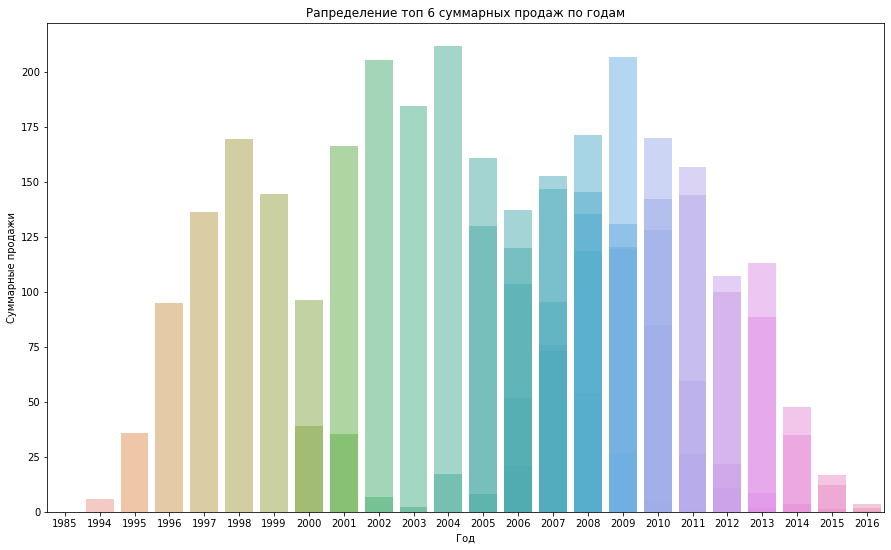

In [42]:
#график рапределения топ 6 суммарных продаж по годам
sns.color_palette('pastel')
plt.figure(figsize=(15, 9))
for i in top6:
    ax = sns.barplot(x=data['year_of_release'], y=data[i], alpha=0.5)
    ax.set(xlabel='Год', ylabel='Суммарные продажи', title='Рапределение топ 6 суммарных продаж по годам');

На таком графике плохо видно зависимость, рассмотрим каждую платформу отдельно.

In [43]:
#функция для суммарных продаж по годам в зависимости от платформы
def distr_platform(platform):
    data = data_top6.loc[data_top6['platform']==platform]\
                    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.figure(figsize=(15, 9))
    ax = sns.barplot(data=data, x=data.index, y='total_sales',  ci= None)
    ax.set(xlabel='Год', ylabel='Суммарные продажи', title='Рапределение суммарных продаж по годам платформы '+ platform);
    return data.index.max() - data.index.min() + 1

10

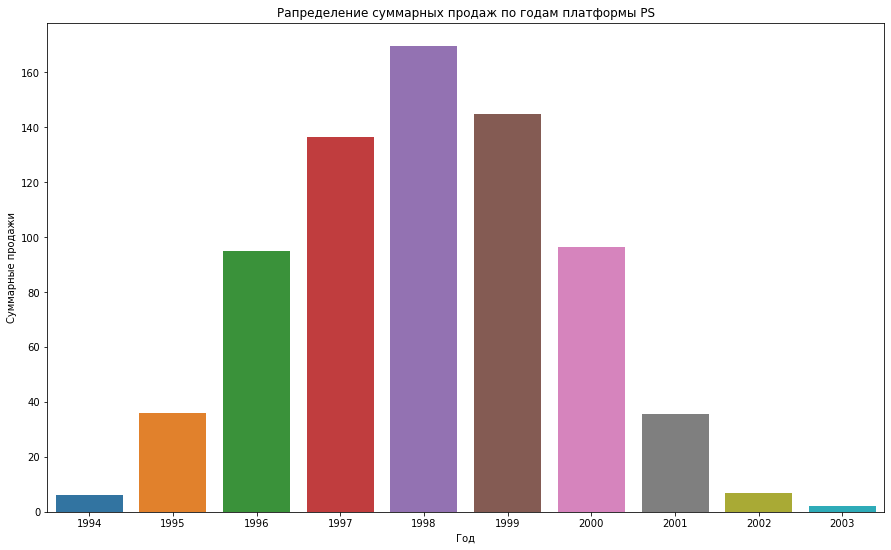

In [44]:
distr_platform('PS')

Полный жизненный цикл платформы составил 10 лет. С 1994 года, с момента появления платформы, идет рост продаж платформы с пиком в 1998 году. Далее с 1999 года, через 5 лет, происходит спад суммарных продаж, платформа постепенно уходит с рынка. 

12

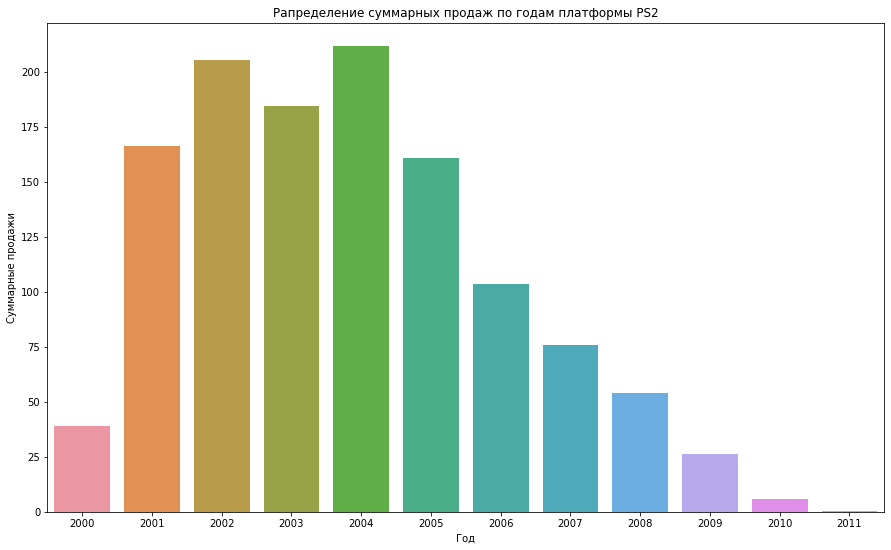

In [45]:
distr_platform('PS2')

Полный жизненный цикл платформы составил 12 лет. При этом популярность платформа заработала буквально за 1 год после своего появления: появилась в 2000 году, на следующий год - 2001 год - продажи выросли больше чем в 4 раза. Распространение платформы заняло 5 лет, именно на этом промежутке с 2000 по 2004 год продажи в целом росли. С 2005 года, через 5 лет, происходит спад суммарных продаж, платформа постепенно уходит с рынка. Стоит отметить, что эта версия платформы появилась как раз после пика предыдущей версии PS. 

11

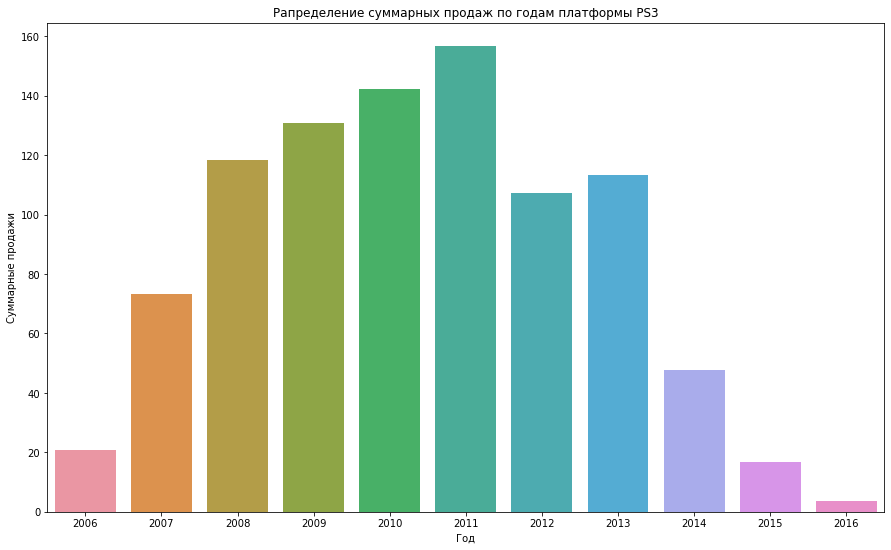

In [46]:
distr_platform('PS3')

Официальный год выхода PS3 - 2006 год, поэтому полный жизненный цикл платформы составил 11 лет.  В течение 6 лет, до 2011 год продажи только растут. И в 2012 году происходит спад продаж, платформа постепенно уходит с рынка. Эта платформа также вышла на смену предыдущей версии PS2.

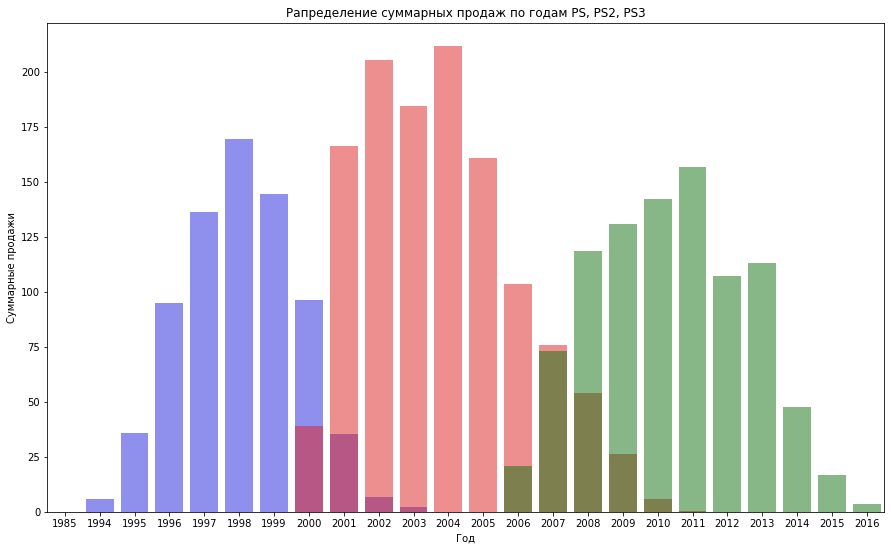

In [47]:
data = data_top6.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
data = data.reset_index()

plt.figure(figsize=(15, 9))
ax = sns.barplot(x=data['year_of_release'], y=data["PS"], color='b', alpha=0.5)
ax = sns.barplot(x=data['year_of_release'], y=data["PS2"], color='r', alpha=0.5)
ax = sns.barplot(x=data['year_of_release'], y=data["PS3"], color='g', alpha=0.5)
ax.set(xlabel='Год', ylabel='Суммарные продажи', title='Рапределение суммарных продаж по годам PS, PS2, PS3');

Сводный график суммарных продаж по годам различных версий платформы PlayStation позволяет судить о сроке появления новых и уходе старых платформ. Это занимает 4-5 лет (совпадающие столбцы на графике).

12

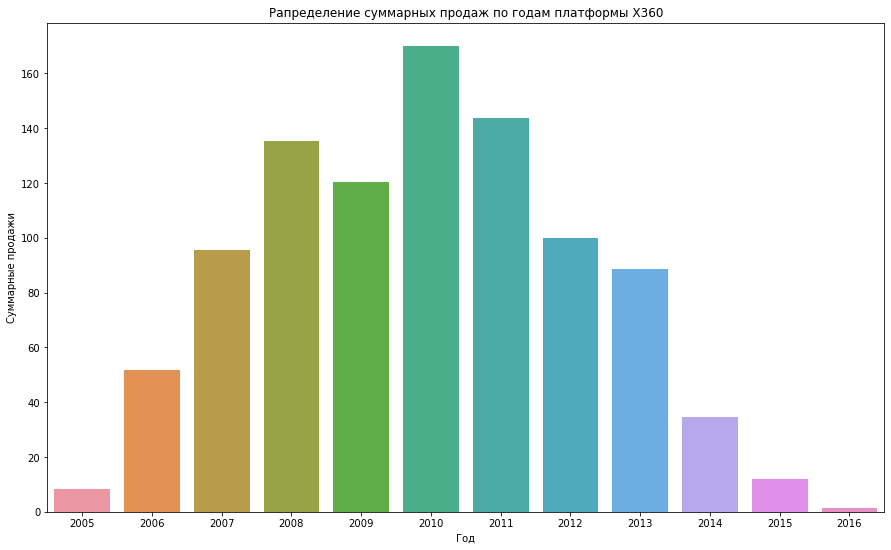

In [48]:
distr_platform('X360')

Полный жизненный цикл платформы составил 12 лет. В течение 6 лет, с 2005 по 2010 год платформа приобретала популярность с пиком в 2010 году. С 2011 года, через 6 лет, происходит спад суммарных продаж, платформа постепенно уходит с рынка.

11

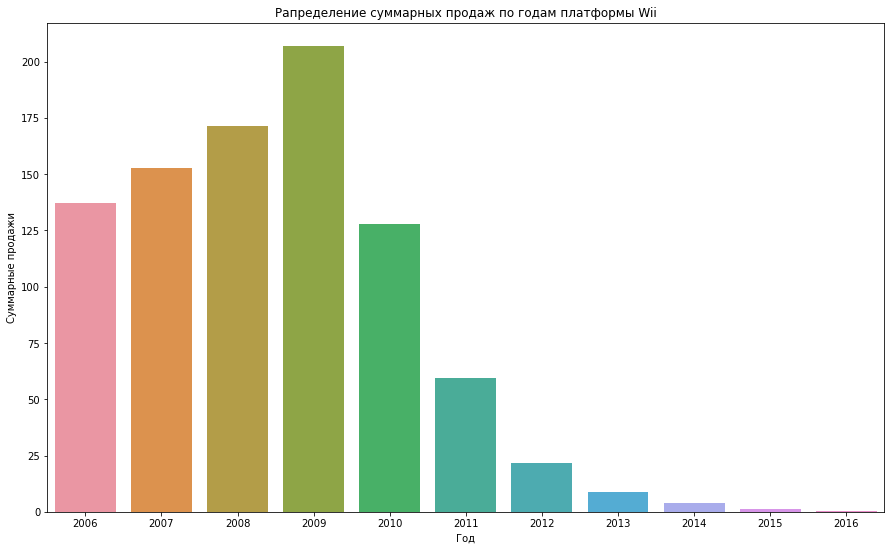

In [49]:
distr_platform('Wii')

Полный жизненный цикл платформы составил 11 лет. В течение первых 4 лет, с 2006 по 2009 год платформа приобретала популярность с пиком в 2009 году. С 2010 года происходит спад суммарных продаж, платформа постепенно уходит с рынка.

29

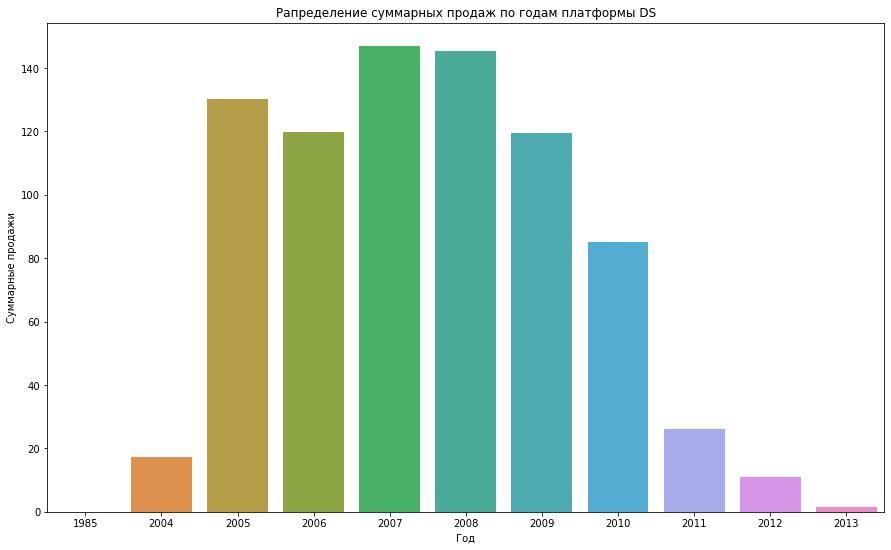

In [50]:
distr_platform('DS')

В показателях этой платформы присутствует значение от 1985 года, хотя этой платформы не существовало в этом году. Поэтому здесь кроется ошибка в данных. Данную строку следует удалить из набора данных.

In [51]:
df.loc[(df['platform']=='DS') & (df['year_of_release'] ==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,no rating,0.02


In [52]:
df = df.drop(index=15957).reset_index(drop=True)
df.info()
df.tail(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  float64
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
 11  total_sales      16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16437,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,-1.0,-1.0,no rating,0.01
16438,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,-1.0,-1.0,no rating,0.01
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,-1.0,-1.0,no rating,0.01
16440,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,-1.0,-1.0,no rating,0.01
16441,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,-1.0,-1.0,no rating,0.01


In [53]:
data_top6 = data_top6.drop(index=15957).reset_index(drop=True)
data_top6.info()
data_top6.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9260 entries, 0 to 9259
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9260 non-null   object 
 1   platform         9260 non-null   object 
 2   year_of_release  9260 non-null   int64  
 3   genre            9260 non-null   object 
 4   na_sales         9260 non-null   float64
 5   eu_sales         9260 non-null   float64
 6   jp_sales         9260 non-null   float64
 7   other_sales      9260 non-null   float64
 8   critic_score     9260 non-null   float64
 9   user_score       9260 non-null   float64
 10  rating           9260 non-null   object 
 11  total_sales      9260 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 868.2+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9255,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.0,-1.0,-1.0,no rating,0.01
9256,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.0,-1.0,-1.0,E,0.01
9257,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,-1.0,-1.0,no rating,0.00
9258,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,-1.0,-1.0,no rating,0.01
9259,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,-1.0,-1.0,no rating,0.01


10

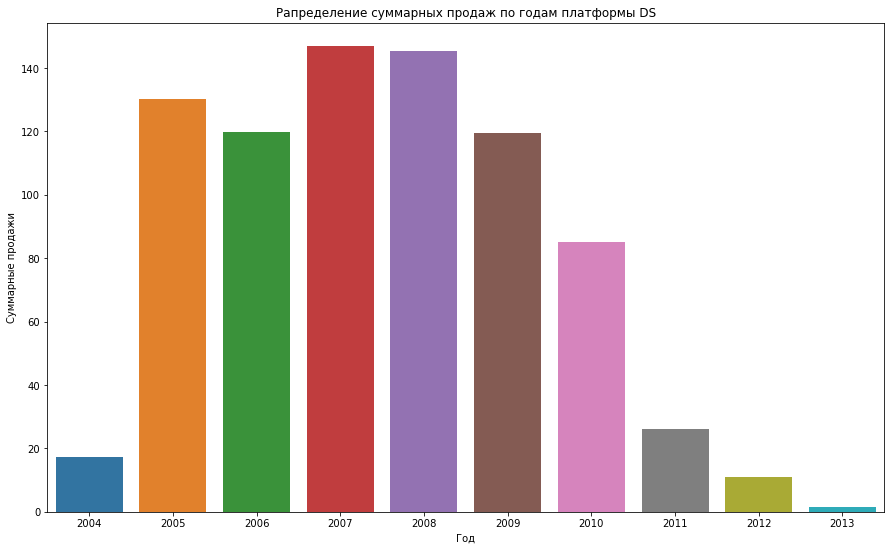

In [54]:
distr_platform('DS')

Полный жизненный цикл платформы составил 10 лет. В течение первых 5 лет, с 2004 по 2008 год платформа приобретала популярность. С 2009 года происходит спад суммарных продаж, платформа постепенно уходит с рынка.

In [55]:
#оценим жизненный цикл всех платформ
df_life = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
df_life.columns = df_life.columns.droplevel(1)
df_life['total_time'] = df_life['max'] - df_life['min'] + 1
df_life['total_time'].describe()

count    31.000000
mean      8.000000
std       5.899152
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      32.000000
Name: total_time, dtype: float64

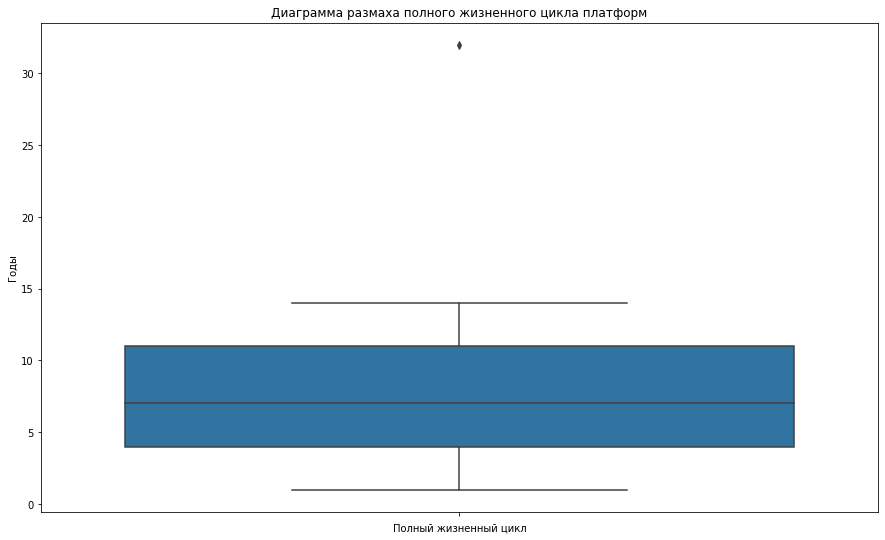

In [56]:
#Диаграмма размаха полного жизненного цикла платформ
plt.figure(figsize=(15, 9))
ax = sns.boxplot(data=df_life, y="total_time")
ax.set(xlabel='Полный жизненный цикл', ylabel='Годы', title='Диаграмма размаха полного жизненного цикла платформ')
plt.show()

Полный жизненный цикл платформ составляет от 1 года до 32 лет, ввиду такого разброса данных и наличия выбора, в качества центрального показателя выборки возьмем медиану. Таким образом, полный жизненный цикл платформы составляет около 7 лет. Но с учетом роста продаж игр на платформе  и ухода с рынка за 4-5 лет, в качестве актуального периода для прогноза на 2017 года возьмем последние 5 лет, то есть с 2012 года. 

В связи с полученными выводами актуальный период для прогноза на 2017 года определим в последние 5 лет, то есть с 2012 года.

In [57]:
#датасет с данными, начиная с 2012 года
actual_data = df.loc[df['year_of_release'] > 2011]
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int64  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     2885 non-null   float64
 9   user_score       2885 non-null   float64
 10  rating           2885 non-null   object 
 11  total_sales      2885 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.0+ KB


In [58]:
#продажи по платформам и годам выпуска
actual_data_pivot = actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
actual_data_pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Платформы DS, PSP уже вышли с рынка. Продажи платформ 3DS, PC, PSV, Wii, X360 падают. Потенциально прибыльными являются PS4 и XOne, которые еще не прошли свой пик роста (замеченный у других платформ в 5 лет) и следующий год может быть потенциально таким. Тем более, что продажи в последний (2016 год) больше по сравнению с годом выпуска платформы.

*Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.*

In [59]:
#суммарные продажи с описательной статистикой и диаграммой размаха
def box_sales_platform(platform):
    plt.figure(figsize=(15, 9))
    data = actual_data.loc[actual_data['platform']==platform, ]
    ax = sns.boxplot(data=data, y="total_sales")
    ax.set(xlabel=platform, ylabel='Суммарные продажи, млн. копий', title='Диаграмма размаха суммарных продаж ' + platform);
    plt.show()
    plt.figure(figsize=(15, 9))
    ax = sns.boxplot(data=data, y="total_sales")
    plt.ylim(0, 2)
    ax.set(xlabel=platform, ylabel='Суммарные продажи, млн. копий', title='Диаграмма размаха суммарных продаж ' + platform);
    return data['total_sales'].describe()

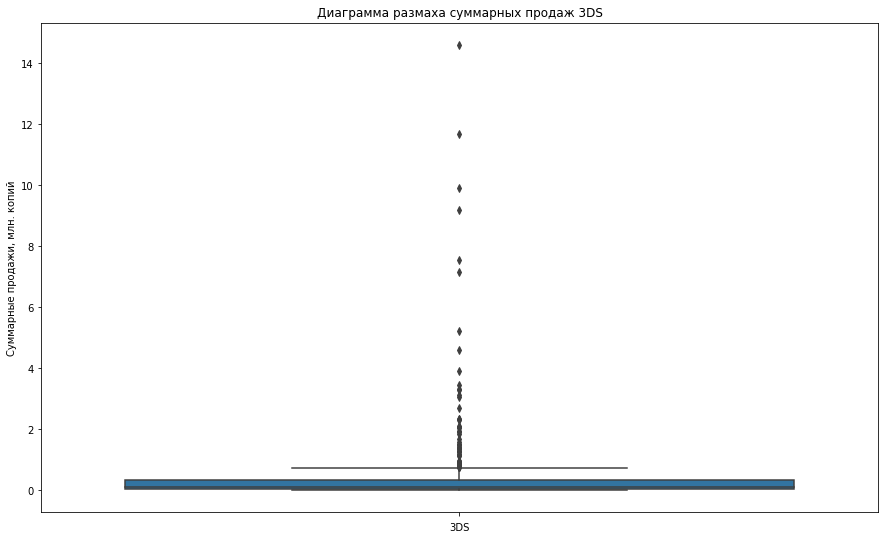

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: total_sales, dtype: float64

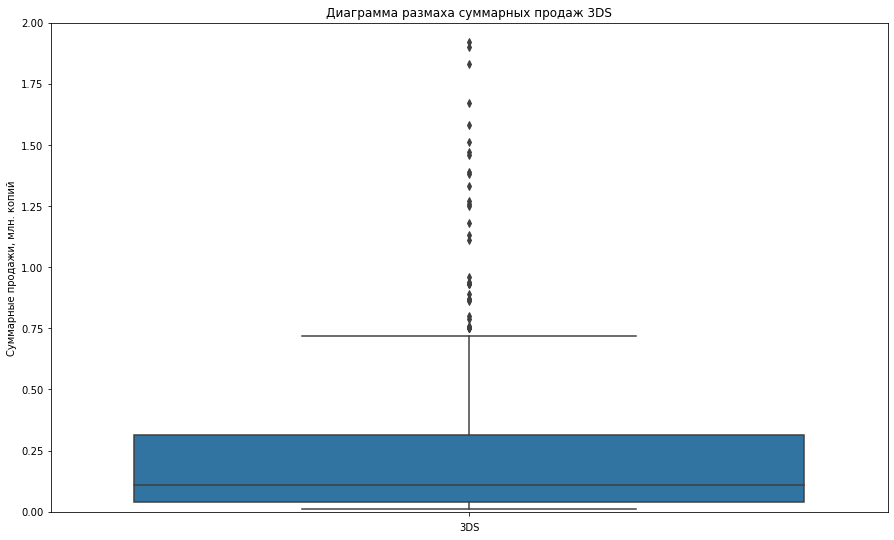

In [60]:
box_sales_platform('3DS')

Медиана выборки 0.11 (поскольку в выборке суммарных продаж для 3DS очень много выбросов, то в качестве меры центральной тенденции нужно выбрать медиану). 50% суммарных продаж варьирует от 0.04 млн до 0.32 млн копий. Минимальные продажи 0.01 млн, максимальные - 14.6 млн.

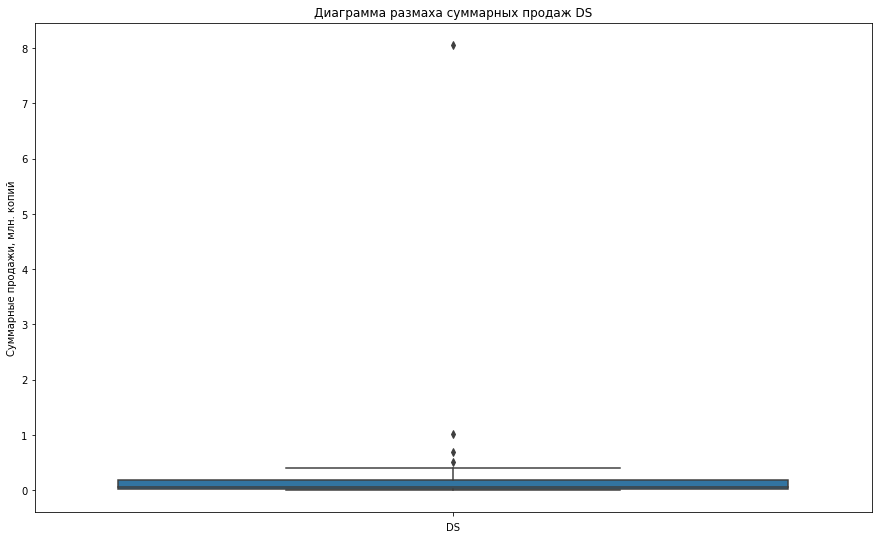

count    31.000000
mean      0.404839
std       1.439245
min       0.010000
25%       0.020000
50%       0.050000
75%       0.185000
max       8.060000
Name: total_sales, dtype: float64

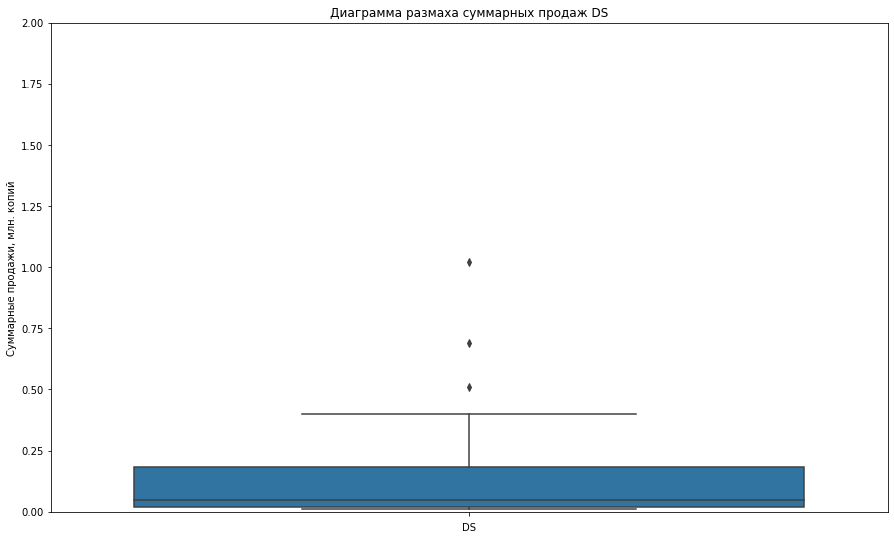

In [61]:
box_sales_platform('DS')

Медиана выборки 0.05. 50% суммарных продаж варьирует от 0.02 млн до 0.185 млн копий. Минимальные продажи 0.01 млн, максимальные - 8.06 млн.

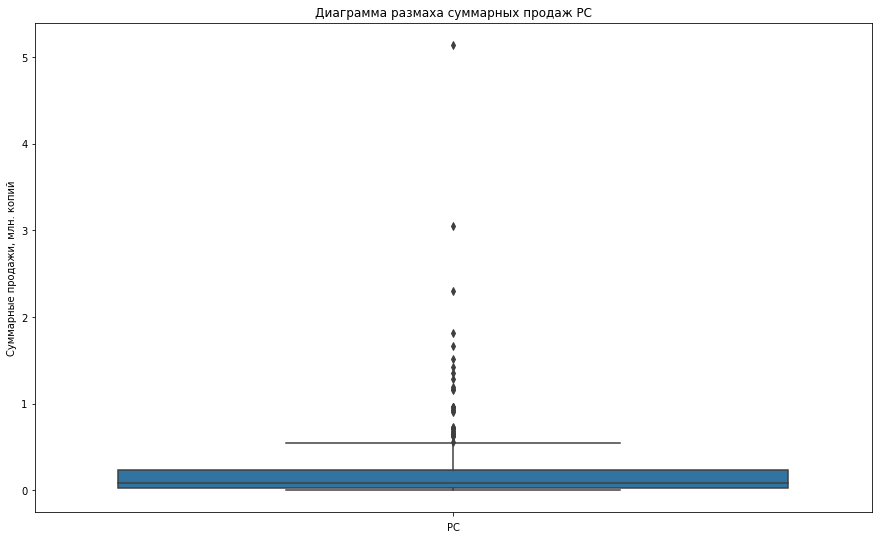

count    250.00000
mean       0.25060
std        0.49464
min        0.01000
25%        0.03000
50%        0.08000
75%        0.24000
max        5.14000
Name: total_sales, dtype: float64

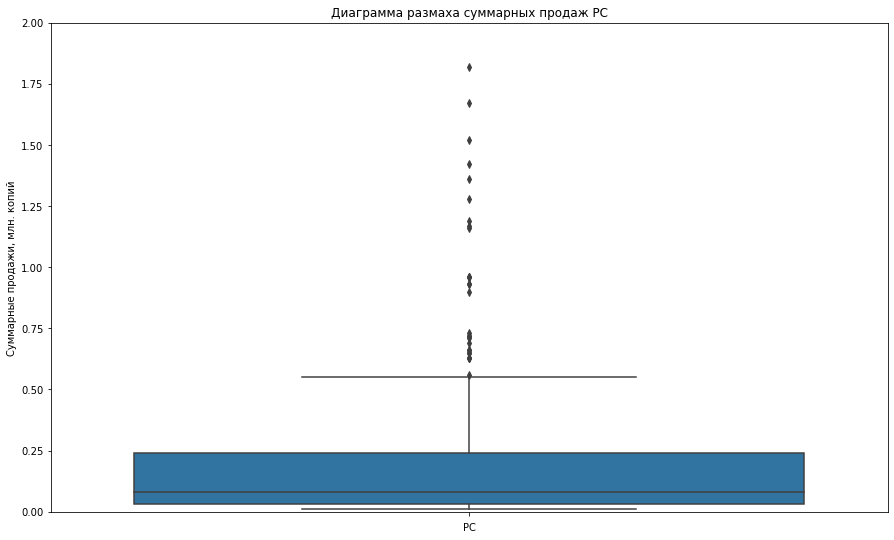

In [62]:
box_sales_platform('PC')

Медиана выборки 0.08. 50% суммарных продаж варьирует от 0.03 млн до 0.24 млн копий. Минимальные продажи 0.01 млн, максимальные - 5.14 млн.

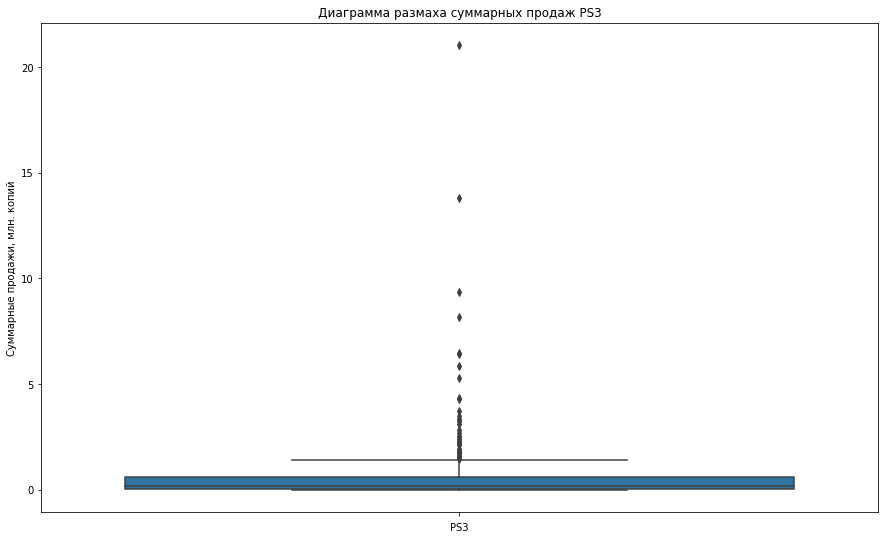

count    492.000000
mean       0.586951
std        1.464113
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: total_sales, dtype: float64

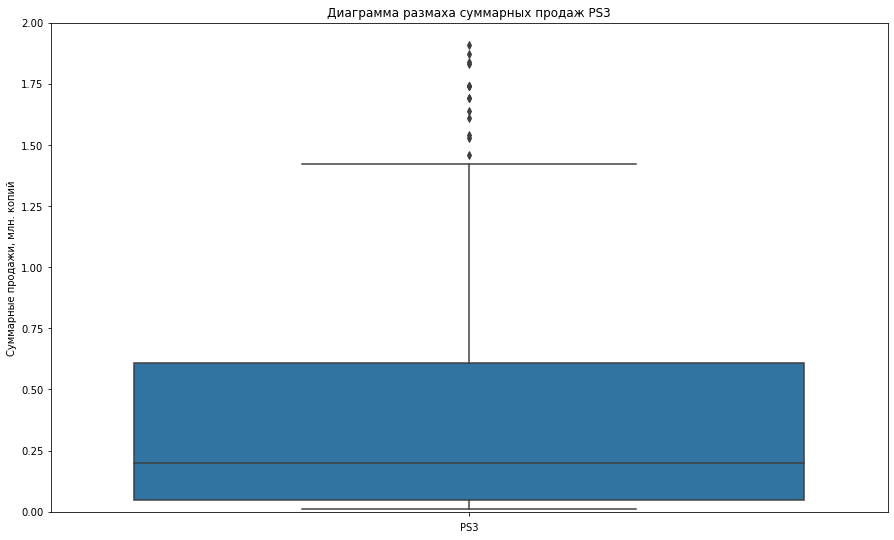

In [63]:
box_sales_platform('PS3')

Медиана выборки 0.2. 50% суммарных продаж варьирует от 0.05 млн до 0.61 млн копий. Минимальные продажи 0.01 млн, максимальные - 21.05 млн.

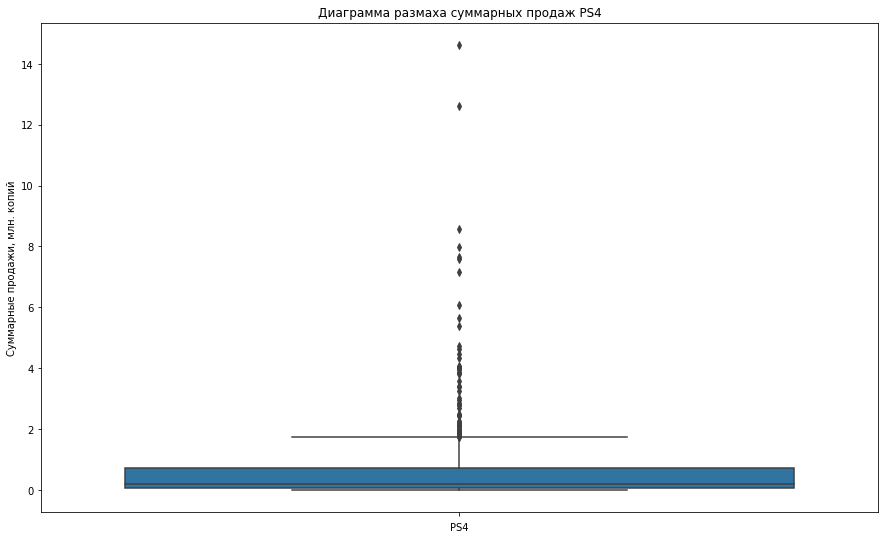

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

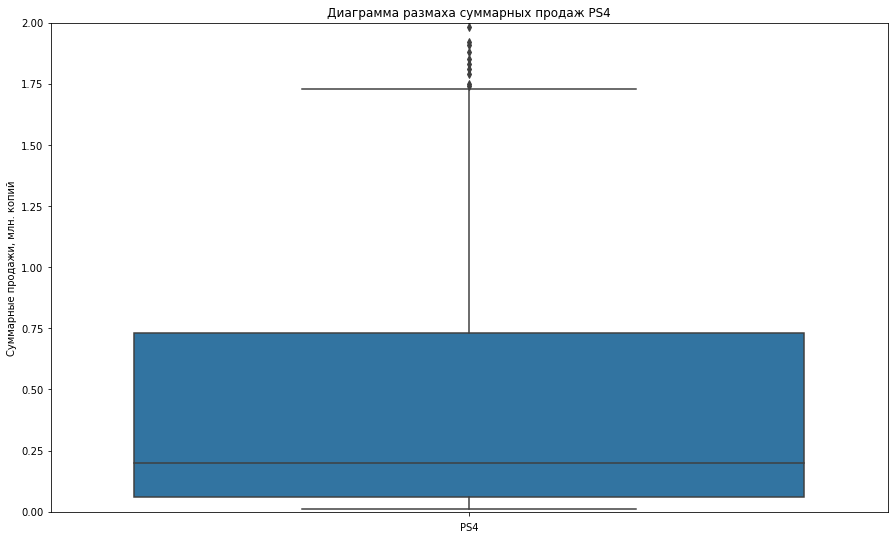

In [64]:
box_sales_platform('PS4')

Медиана выборки 0.2. 50% суммарных продаж варьирует от 0.06 млн до 0.73 млн копий. Минимальные продажи 0.01 млн, максимальные - 14.63 млн.

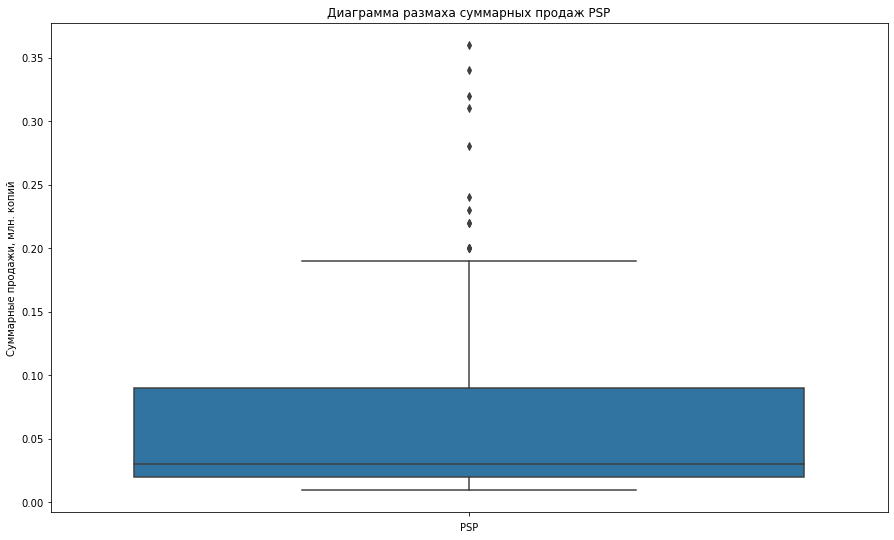

count    173.000000
mean       0.064682
std        0.071296
min        0.010000
25%        0.020000
50%        0.030000
75%        0.090000
max        0.360000
Name: total_sales, dtype: float64

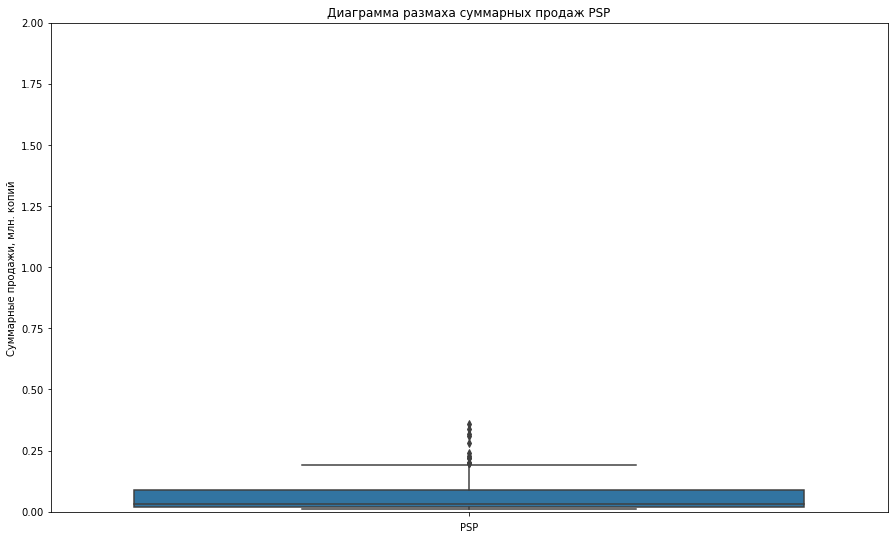

In [65]:
box_sales_platform('PSP')

Медиана выборки 0.03. 50% суммарных продаж варьирует от 0.02 млн до 0.09 млн копий. Минимальные продажи 0.01 млн, максимальные - 0.36 млн.

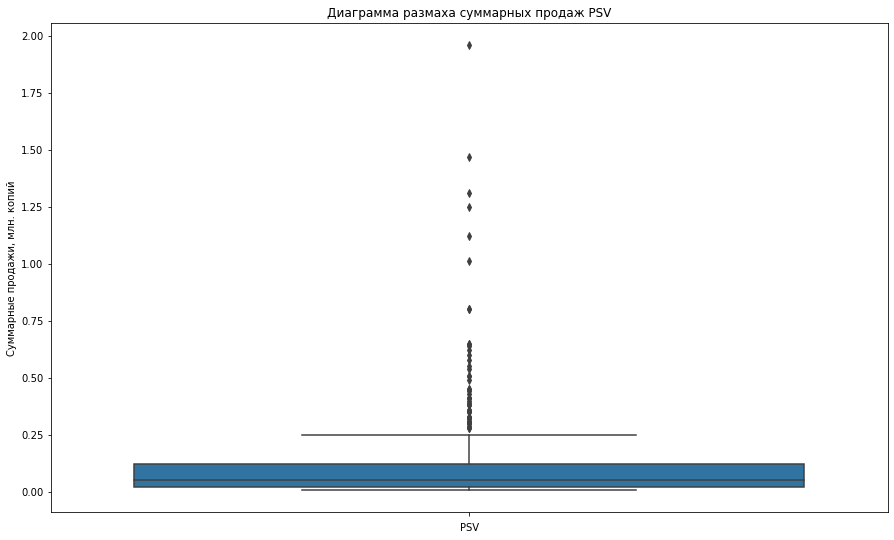

count    411.000000
mean       0.119659
std        0.203011
min        0.010000
25%        0.020000
50%        0.050000
75%        0.120000
max        1.960000
Name: total_sales, dtype: float64

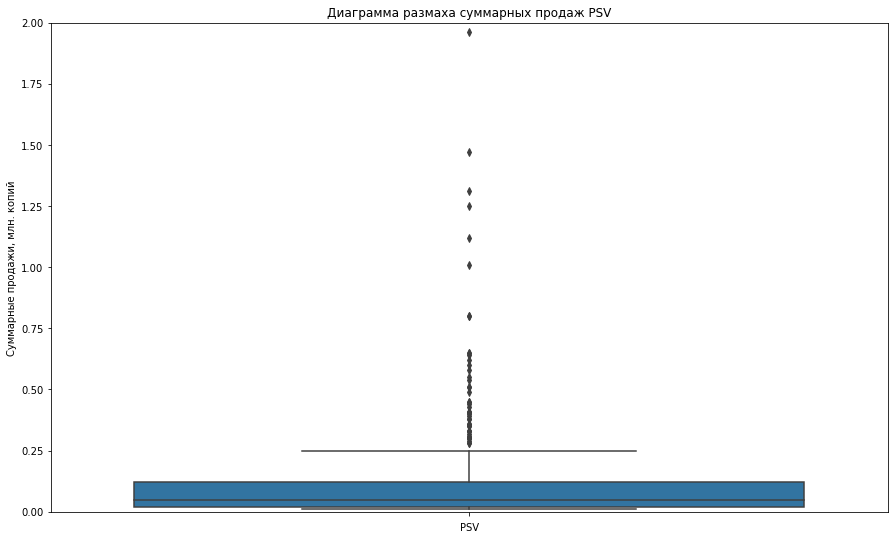

In [66]:
box_sales_platform('PSV')

Медиана выборки 0.05. 50% суммарных продаж варьирует от 0.02 млн до 0.12 млн копий. Минимальные продажи 0.01 млн, максимальные - 1.96 млн.

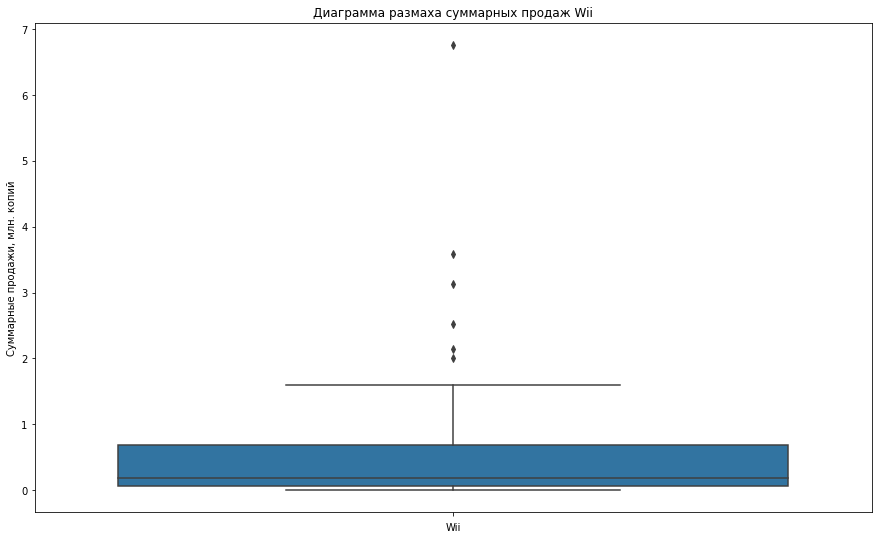

count    54.000000
mean      0.655000
std       1.165447
min       0.010000
25%       0.062500
50%       0.180000
75%       0.687500
max       6.760000
Name: total_sales, dtype: float64

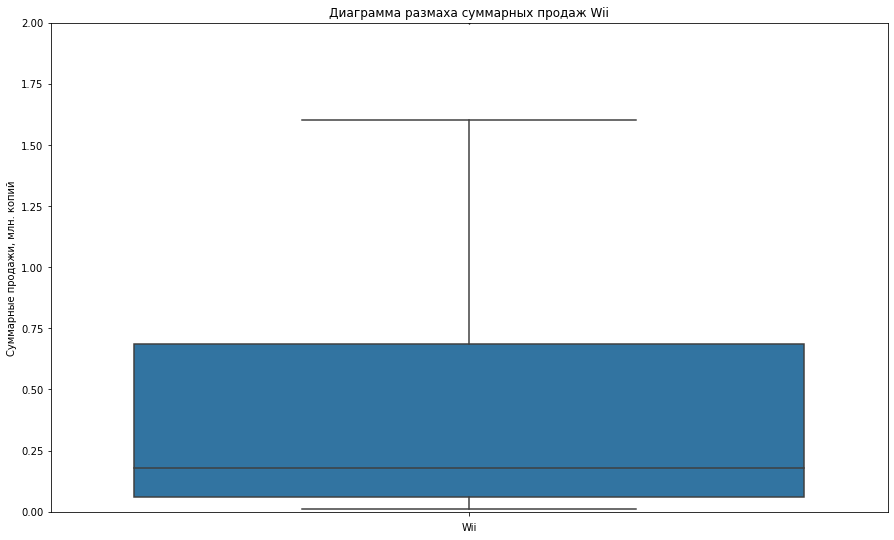

In [67]:
box_sales_platform('Wii')

Медиана выборки 0.18. 50% суммарных продаж варьирует от 0.0625 млн до 0.6875 млн копий. Минимальные продажи 0.01 млн, максимальные - 6.76 млн.

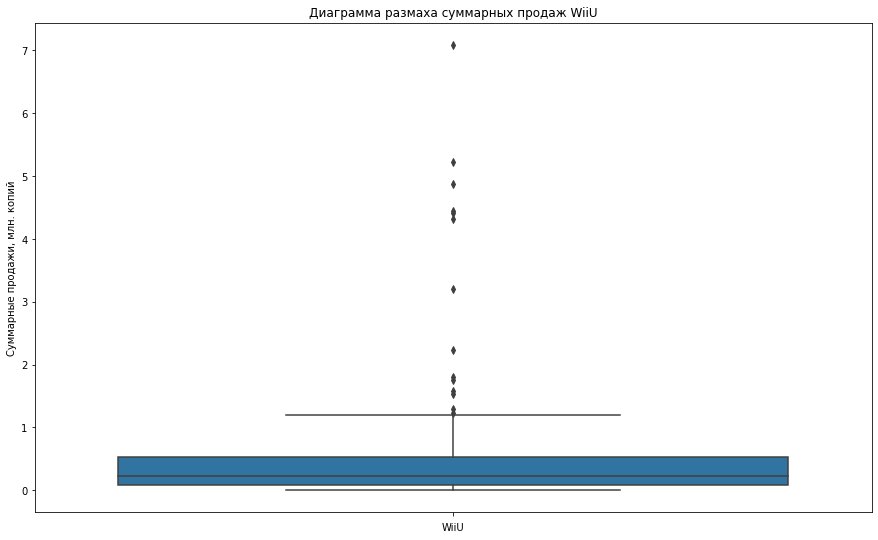

count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: total_sales, dtype: float64

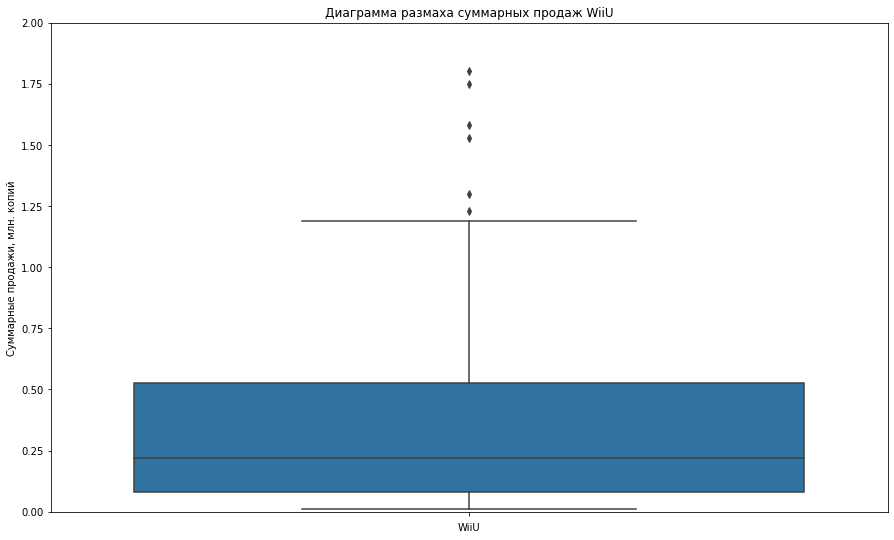

In [68]:
box_sales_platform('WiiU')

Медиана выборки 0.22. 50% суммарных продаж варьирует от 0.08 млн до 0.525 млн копий. Минимальные продажи 0.01 млн, максимальные - 7.09 млн.

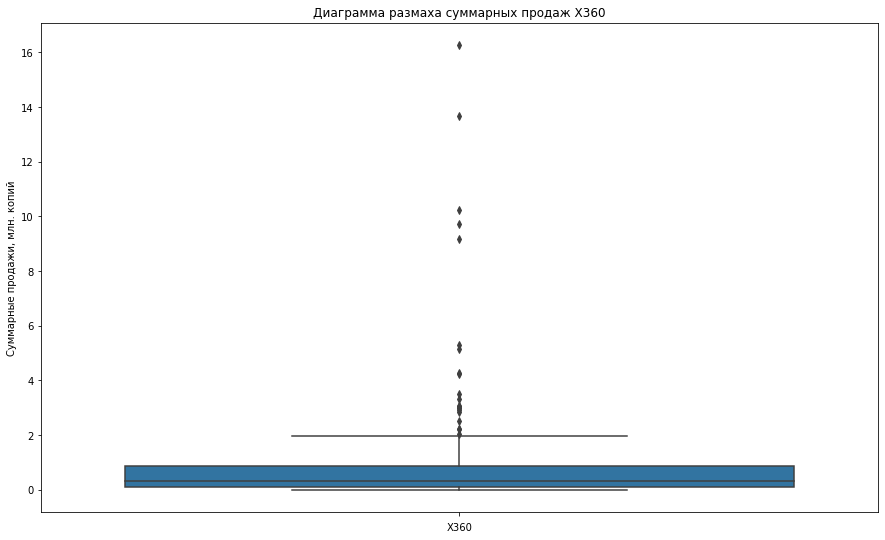

count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: total_sales, dtype: float64

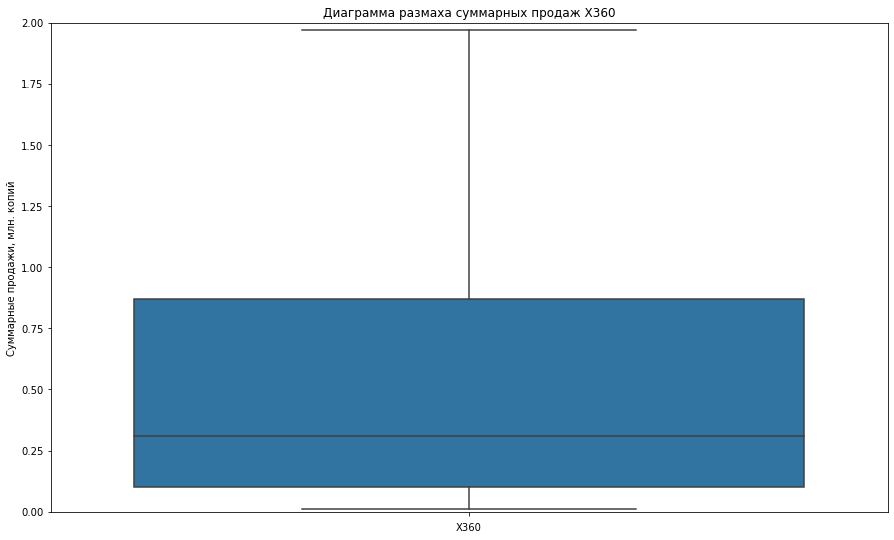

In [69]:
box_sales_platform('X360')

Медиана выборки 0.31. 50% суммарных продаж варьирует от 0.1 млн до 0.87 млн копий. Минимальные продажи 0.01 млн, максимальные - 16.27 млн.

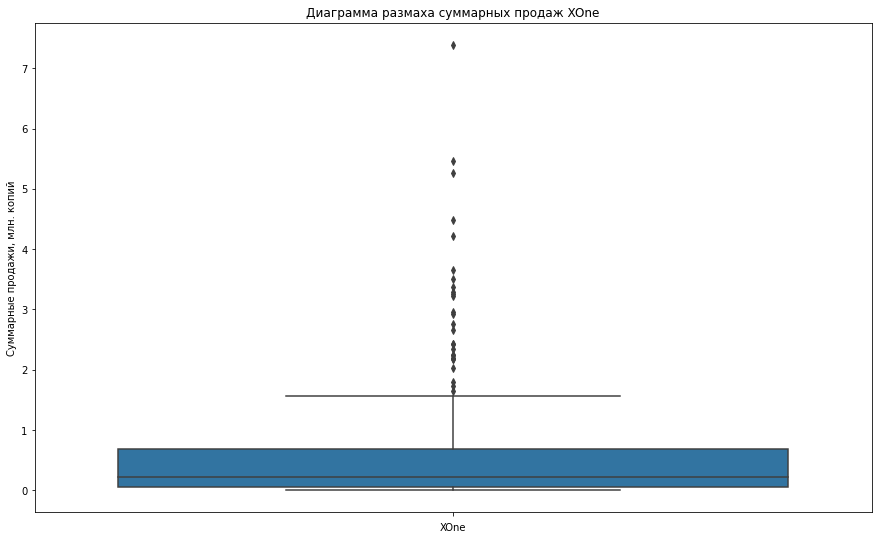

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

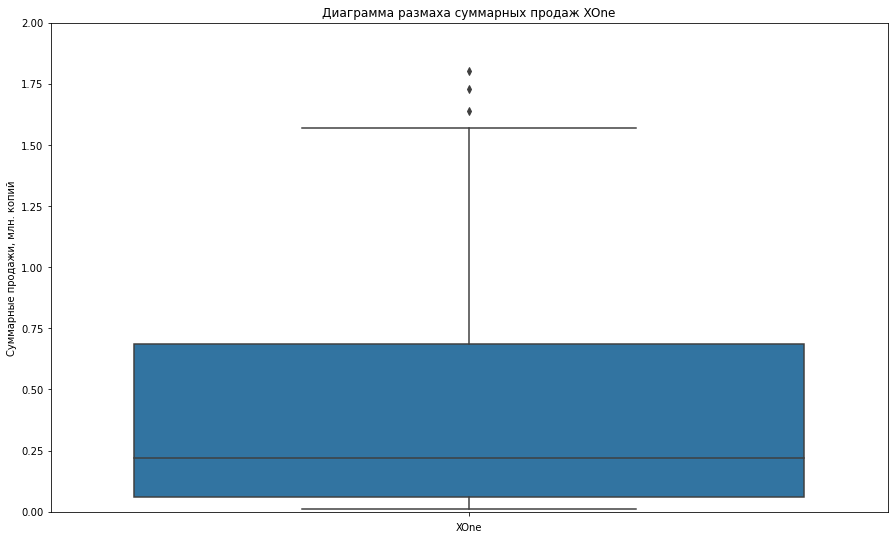

In [70]:
box_sales_platform('XOne')

Медиана выборки 0.22. 50% суммарных продаж варьирует от 0.06 млн до 0.685 млн копий. Минимальные продажи 0.01 млн, максимальные - 7.39 млн.

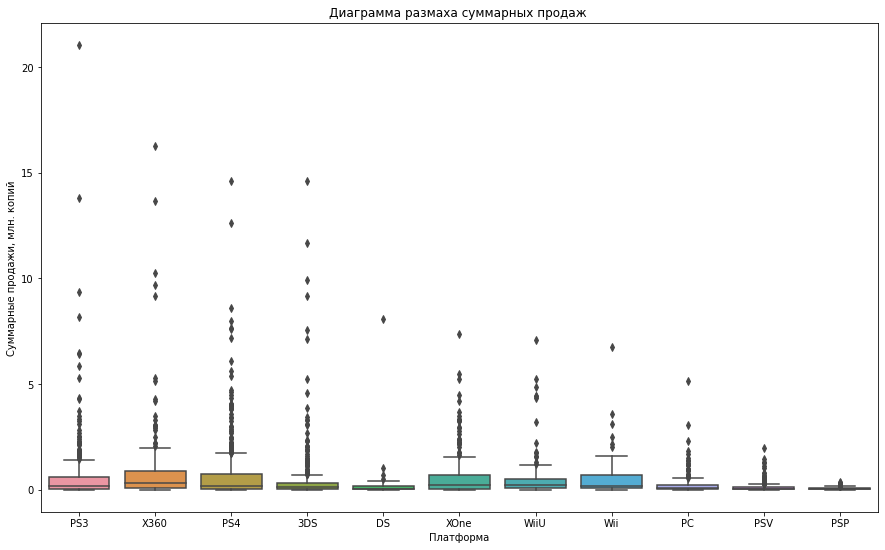

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,492.0,0.586951,1.464113,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


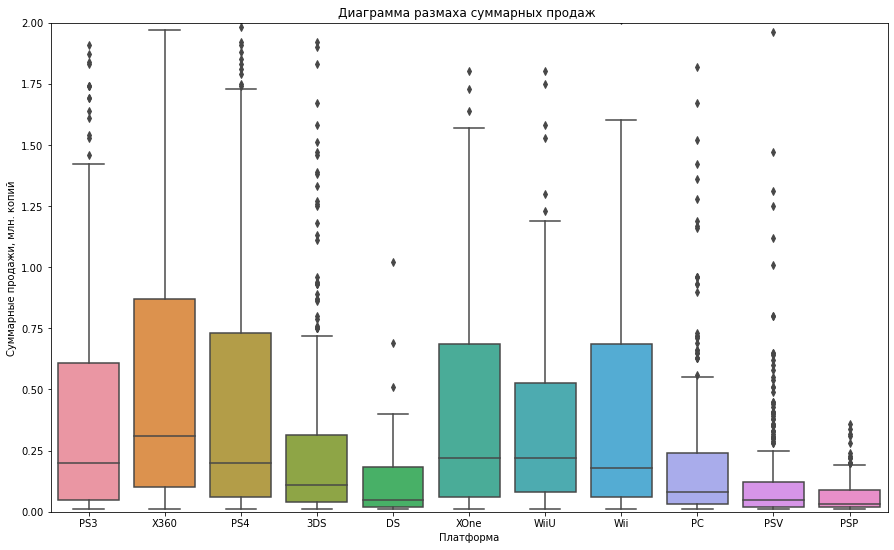

In [71]:
plt.figure(figsize=(15, 9))
ax = sns.boxplot(data=actual_data, y="total_sales", x='platform')
ax.set(xlabel='Платформа', ylabel='Суммарные продажи, млн. копий', title='Диаграмма размаха суммарных продаж ' )
plt.show()
plt.figure(figsize=(15, 9))
plt.ylim(0, 2)
ax = sns.boxplot(data=actual_data, y="total_sales", x='platform')
ax.set(xlabel='Платформа', ylabel='Суммарные продажи, млн. копий', title='Диаграмма размаха суммарных продаж ' )
actual_data.groupby('platform')['total_sales'].describe()


*Вывод*:

Как видим на общей диаграмме размаха, суммарные продажи довольно нестабильны: очень много выбросов.  
Максимальные продажи были у PS3, минимальные продажи у всех платформ совпадают. Медианные значения колеблются от 0.04 до 0.31 млн копий.

In [72]:
#выберем в качестве популярной платформы с максимумом по суммарным продажам
top6_corr = actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top6_corr

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

Максимальные суммарные продажи у PS4. Возьмем эту платформу и посмотрим, есть ли взаимосвзязь между отзывами и продажами. При подготовке данных исключим также отзывы, равные -1, так как это мы заполняли просто для индикации отсутствия отзыва.

In [73]:
#датафрейм для записи коэффициентов корреляции
user_critic_sales = pd.DataFrame(columns=['platform', 'user_sales', 'critic_sales'])

In [74]:
#функция для расчета корреляции
def corr_platform_score(platform):
    d_user = actual_data.loc[(actual_data['platform']==platform) & (actual_data['user_score']!=-1), 
                             ['total_sales', 'user_score']]
    if d_user.shape[0] > 3:
        d_user.plot(kind='scatter', x='total_sales', y='user_score')
        plt.title('Диаграмма рассеяния между отзывами пользователя и суммарными продажами для платформы ' + platform )
        plt.xlabel('Суммарные продажи, млн копий')
        plt.ylabel('Оценка пользователя');
        plt.show()
        corr_user = round(d_user['user_score'].corr(d_user['total_sales']), 2)
        print('Коэффициент корреляции между отзывом пользователя и суммарными продажами', corr_user)
    else:
        print('Недостаточно данных')
        
    d_critic = actual_data.loc[(actual_data['platform']==platform) & (actual_data['critic_score']!=-1), 
                               ['total_sales', 'critic_score']]
    if d_critic.shape[0] > 3:
        d_critic.plot(kind='scatter', x='total_sales', y='critic_score')

        plt.title('Диаграмма рассеяния между отзывами критика и суммарными продажами для платформы ' + platform )
        plt.xlabel('Суммарные продажи, млн копий')
        plt.ylabel('Оценка критика');
        corr_critic = round(d_critic['critic_score'].corr(d_critic['total_sales']), 2)
        user_critic_sales.loc[ len(user_critic_sales.index )] = [platform, corr_user, corr_critic]
        print('Коэффициент корреляции между отзывом критика и суммарными продажами', corr_critic)
    else:
        print('Недостаточно данных')

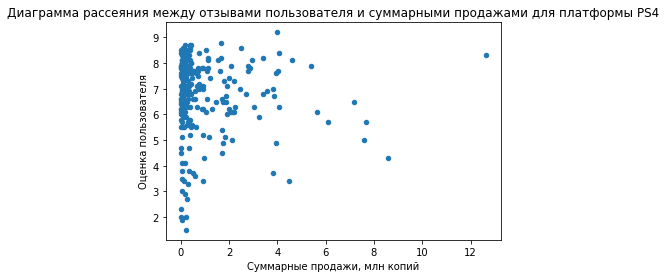

Коэффициент корреляции между отзывом пользователя и суммарными продажами -0.03
Коэффициент корреляции между отзывом критика и суммарными продажами 0.41


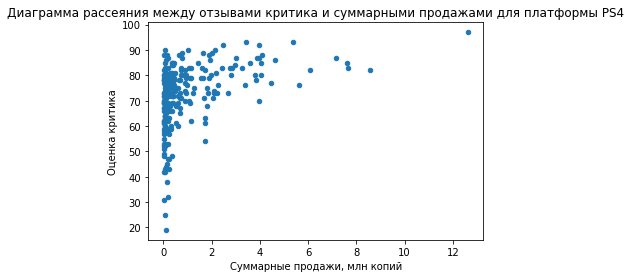

In [75]:
ps4 = corr_platform_score('PS4')

Между оценкой критика и суммарными продажами наблюдается положительный по силе слабый коэффициент корреляции. Между оценкой пользователя и суммарными продажами наблюдается отрицательный по силе очень слабый коэффициент корреляции (можно говорить, что корреляция отсутствует).

Оценим взаимосвзязь между отзывами и продажами других платформ из топ 6 по продажам.

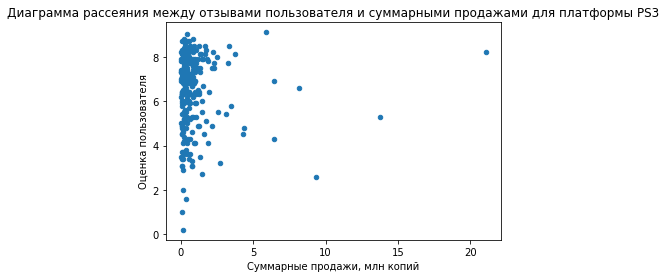

Коэффициент корреляции между отзывом пользователя и суммарными продажами -0.01
Коэффициент корреляции между отзывом критика и суммарными продажами 0.33


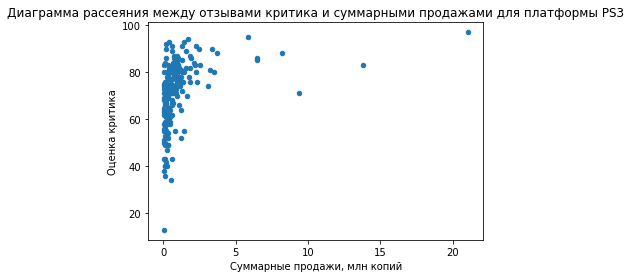

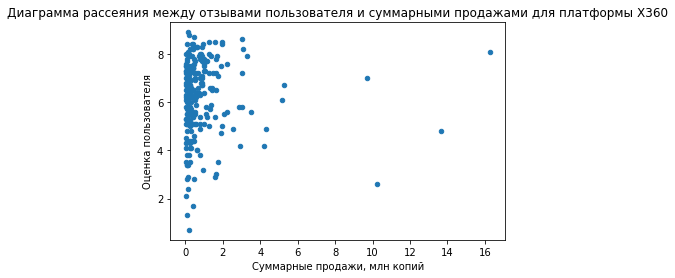

Коэффициент корреляции между отзывом пользователя и суммарными продажами 0.01
Коэффициент корреляции между отзывом критика и суммарными продажами 0.36


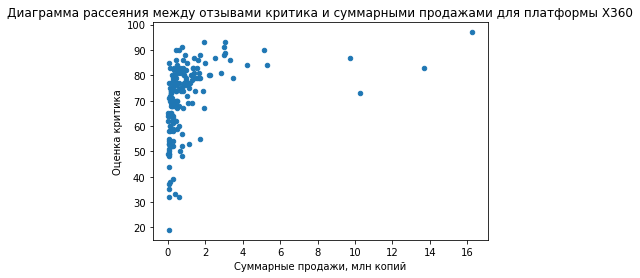

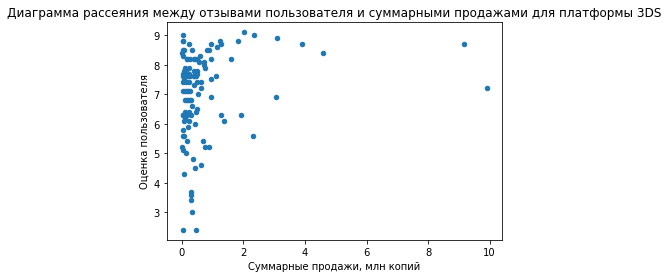

Коэффициент корреляции между отзывом пользователя и суммарными продажами 0.2
Коэффициент корреляции между отзывом критика и суммарными продажами 0.32


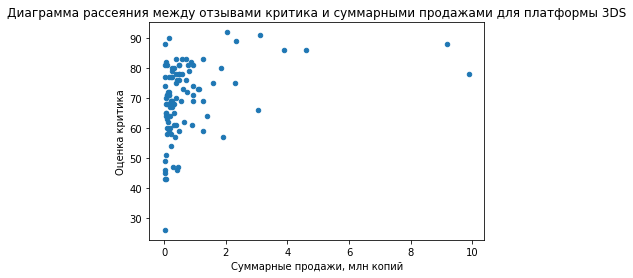

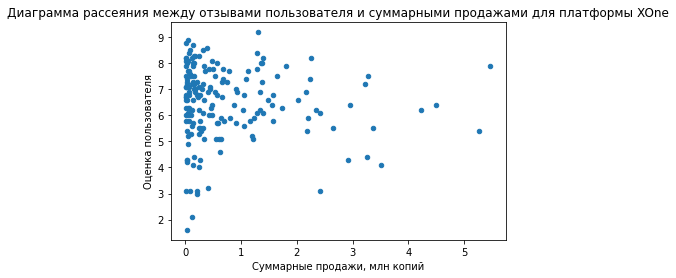

Коэффициент корреляции между отзывом пользователя и суммарными продажами -0.07
Коэффициент корреляции между отзывом критика и суммарными продажами 0.42


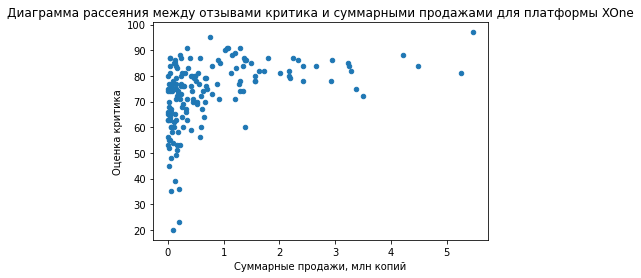

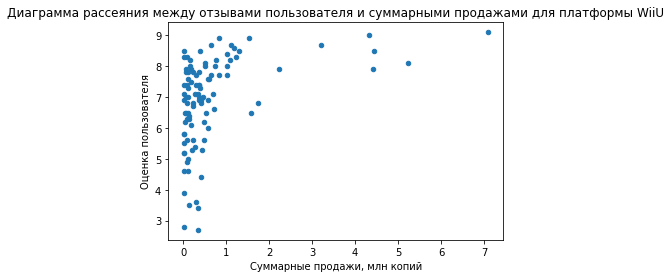

Коэффициент корреляции между отзывом пользователя и суммарными продажами 0.4
Коэффициент корреляции между отзывом критика и суммарными продажами 0.35


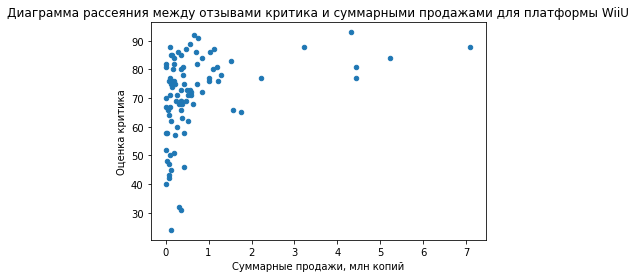

In [76]:
for i in range(1, 6):
    corr_platform_score(top6_corr.index[i])

In [77]:
user_critic_sales

,platform,user_sales,critic_sales
0,PS4,-0.03,0.41
1,PS3,-0.01,0.33
2,X360,0.01,0.36
3,3DS,0.20,0.32
4,XOne,-0.07,0.42
5,WiiU,0.40,0.35


Вывод: между суммарными продажами отзывами критиков наблюдается положительный слабый по силе коэффициент корреляции, между суммарными продажами и отзывами пользователей есть различия: в основном это очень слабый по силе коэффициент корреляции, направление связи разное, но при практически отсутствии взаимосвязи это уже не важно. Однако, есть исключения, например, для платформы WiiU наблюдается положительный слабый по силе коэффициент корреляции.

In [78]:
#общее распределение игр по жанрам
actual_data['genre'].value_counts() / actual_data.shape[0] * 100

Action          35.736568
Role-Playing    12.824957
Adventure       10.467938
Sports           9.254766
Shooter          8.145581
Misc             6.655113
Racing           3.986135
Fighting         3.778163
Platform         2.946274
Simulation       2.772964
Strategy         2.461005
Puzzle           0.970537
Name: genre, dtype: float64

Более трети всех продаваемых игр относятся к жанру Action, вторым по полярности идет жанр Role-Playing, которые втрое меньше первого -12.8%, далее немного уступая, Adventure - 10.4%. Самыми непопулярными жанрами являются Puzzle(меньше 1%), Strategy - 2.5%, Simulation - 2.8%, Platform - 2.9%.

In [79]:
#продажи по жанрам
genre_sales = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'median']).droplevel(1,axis=1)
genre_sales.sort_values(by='median', ascending=False)

,sum,median
genre,,
Shooter,304.73,0.440
Sports,181.06,0.240
Platform,61.00,0.210
Role-Playing,192.80,0.140
Racing,53.50,0.140
Fighting,44.49,0.130
Action,441.12,0.120
Misc,85.04,0.120
Simulation,35.12,0.120


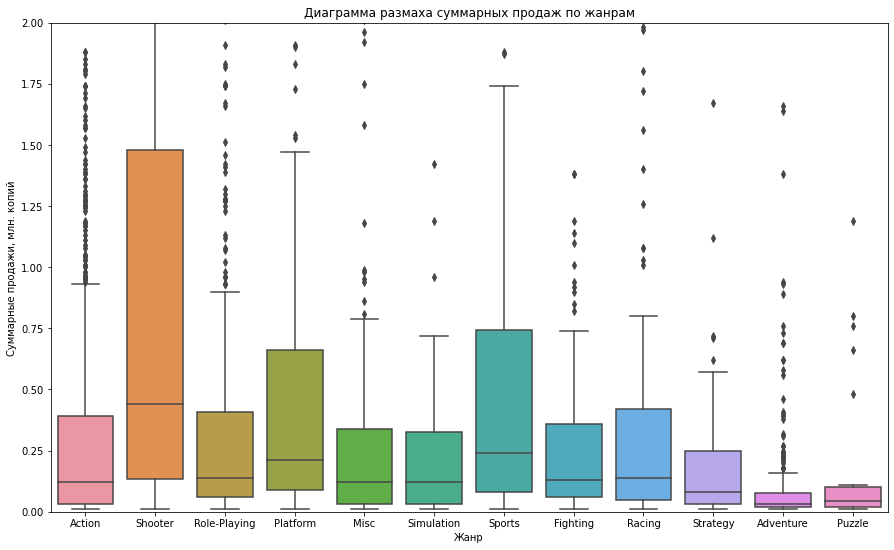

In [80]:
#Диаграмма размаха суммарных продаж по жанрам
plt.figure(figsize=(15, 9))
plt.ylim(0, 2)
ax = sns.boxplot(data=actual_data, y="total_sales", x='genre')
ax.set(xlabel='Жанр', ylabel='Суммарные продажи, млн. копий', title='Диаграмма размаха суммарных продаж по жанрам' );

Если смотреть суммарные продажи, то самыми прибыльными жанрами оказались Action и Shooter. Самые низкие продажи у Puzzle. Однако, поскольку прибыль напрямую связано с количеством проданных копий, посмотрим медианные значения продаж по жанрам.
Получается, что в плане стабильного дохода прибыльными окажутся игры жанра Shooter, Sports и Platform, самая низкая прибыль у жанров Strategy, Puzzle и Adventure.

**Общий вывод по исследовательскому анализу:**

С 1980 до 1994 год в количестве выпускаемых игр нет тенденции, их количество то уменьшается, то увеличивается. С 1994 года до  2008 года рынок стабильно растет, что может быть вызвано появлением всемирной паутины, появлением новых технологий, развитием графического дизайна игр, появлением игровых платформ, ростом интереса пользователя. С 2008 года идет спад количества выпускаемых игр, в первую очередь вызванный экономическим кризисом. Кроме того, с этого времени начинается широкое распространение смартфонов и, как следствие, мобильных игр.

Полный жизненный цикл платформ составляет 10-12 лет. Новая платформа появляется, а старая платформа уходит за 4-5 лет.

В связи с полученными выводами актуальный период для прогноза на 2017 года определим в последние 5 лет, то есть с 2012 года.

Платформы DS, PSP уже вышли с рынка. Продажи платформ 3DS, PC, PSV, Wii, X360 падают. Потенциально прибыльными будут PS4 и XOne, которые еще не прошли свой пик рост (замеченный у других платформ в 5 лет) и следующий год может быть потенциально таким. 

Суммарные продажи довольно нестабильны: очень много выбросов. Максимальные продажи были у PS3 (21.05 млн копий), минимальные продажи у всех платформ совпадают (0.01 млн копий). Медианные значения колеблются от 0.04 до 0.31 млн копий.

Между суммарными продажами отзывами критиков наблюдается положительный слабый по силе коэффициент корреляции, между суммарными продажами и отзывами пользователей есть различия: в основном это очень слабый по силе коэффициент корреляции, направление связи разное, но при практически отсутствии взаимосвязи это уже не важно. Однако, есть исключения, например, для платформы WiiU наблюдается положительный слабый по силе коэффициент корреляции.

Более трети всех продаваемых игр относятся к жанру Action, вторым по полярности идет жанр Role-Playing, которые втрое меньше первого -12.8%, далее немного уступая, Adventure - 10.4%. Самыми непопулярными жанрами являются Puzzle(меньше 1%), Strategy - 2.5%, Simulation - 2.8%, Platform - 2.9%.

Самыми прибыльными жанрами оказались Shooter, Sports и Platform, самая низкая прибыль у жанров Strategy, Puzzle и Adventure.

*Самые популярные платформы (топ-5). Опишите различия в долях продаж.*

In [81]:
#функция, оценивающая продажи по платформам
def user_platform (region):
    platform = actual_data.pivot_table(index='platform', values=region, aggfunc='sum')
    platform_5 = platform.sort_values(by=region, ascending=False).head(5) 
    platform_5[region] = platform_5[region]/actual_data[region].sum()
    platform_5.loc["Другие платформы"] = 1-platform_5[region].sum()
    return platform_5

In [82]:
#функция, выбирающая топ 5 по платформам
def top5 (column):
    platform = actual_data.pivot_table(index=column, values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    platform_5 = platform.sort_values(by=region, ascending=False).head(5) 
    platform_5[region] = platform_5[region]/actual_data[region].sum()
    platform_5.loc["Другие платформы"] = 1-platform_5[region].sum()
    return platform_5

In [83]:
na_platform = user_platform('na_sales')
na_platform

,na_sales
platform,
X360,0.236983
PS4,0.184003
PS3,0.174933
XOne,0.157571
3DS,0.093592
Другие платформы,0.152918


In [84]:
eu_platform = user_platform('eu_sales')
eu_platform

,eu_sales
platform,
PS4,0.278388
PS3,0.210829
X360,0.147037
XOne,0.101794
3DS,0.084134
Другие платформы,0.177818


In [85]:
jp_platform = user_platform('jp_sales')
jp_platform

,jp_sales
platform,
3DS,0.455862
PS3,0.183249
PSV,0.109253
PS4,0.082875
WiiU,0.067556
Другие платформы,0.101205


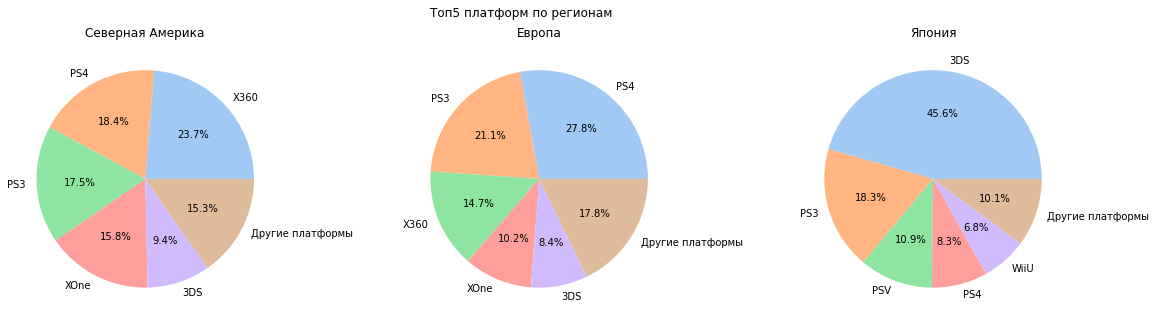

In [86]:
#топ 5 платформ по регионам
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Топ5 платформ по регионам')

ax1.pie(na_platform['na_sales'], labels = list(na_platform.index), colors=sns.color_palette('pastel'), autopct='%1.1f%%')
ax1.set_title('Северная Америка')

ax2.pie(eu_platform['eu_sales'], labels = list(eu_platform.index), colors=sns.color_palette('pastel'), autopct='%1.1f%%')
ax2.set_title('Европа')

ax3.pie(jp_platform['jp_sales'], labels = list(jp_platform.index), colors=sns.color_palette('pastel'), autopct='%1.1f%%')
ax3.set_title('Япония')
plt.show()

Топ 5 платформ по регионам:
* NA - X360, PS4, PS3, XOne, 3DS 
* EU - PS4, PS3, X360, XOne, 3DS
* JP - 3DS, PS3, PSV, PS4, WiiU

В японском регионе лидирует платформа, разработанная японской компаний, причем она занимает около 46% всех проданных копий в этом регионе. У европейцев и американцев в топ 5 входят платформа от американской фирмы Microsoft, в JP регионе этой фирмы в топ5 нет. В NA регионе X360 занимает первое место и составляет около четверти всех продаж, в EU первое место занимает PS4 и составляет около 28% всех продаж.

Во всех регионах в топ 5 входит платформа от японской компании Sony - PlayStation.


In [87]:
#функция популярных жанров по регионам
def user_genre (region):
    genre = actual_data.pivot_table(index='genre', values=region, aggfunc='sum')
    genre_5 = genre.sort_values(by=region, ascending=False).head(5) 
    genre_5[region] = genre_5[region]/actual_data[region].sum()
    genre_5.loc['Другие жанры'] = 1-genre_5[region].sum()
    return genre_5

In [88]:
na_genre = user_genre('na_sales')
na_genre

,na_sales
genre,
Action,0.300929
Shooter,0.244970
Sports,0.137960
Role-Playing,0.108297
Misc,0.064623
Другие жанры,0.143222


In [89]:
eu_genre = user_genre('eu_sales')
eu_genre

,eu_sales
genre,
Action,0.314398
Shooter,0.223891
Sports,0.136304
Role-Playing,0.095756
Racing,0.053847
Другие жанры,0.175806


In [90]:
jp_genre = user_genre('jp_sales')
jp_genre

,jp_sales
genre,
Role-Playing,0.339807
Action,0.274172
Misc,0.066777
Simulation,0.054055
Fighting,0.049019
Другие жанры,0.216170


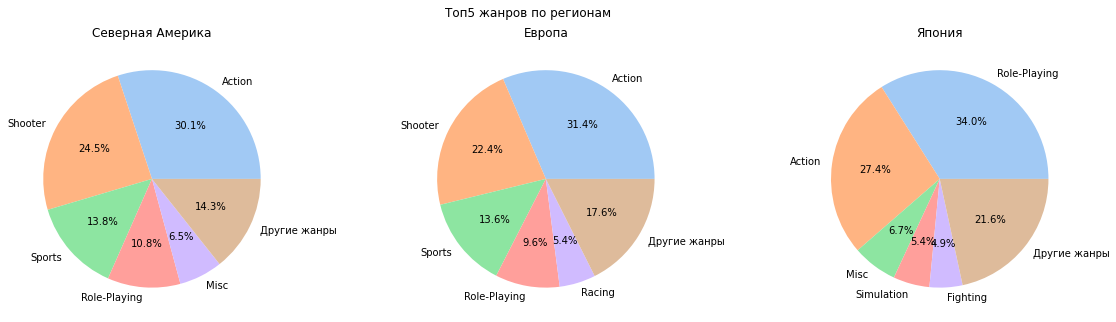

In [91]:
#Топ5 жанров по регионам
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Топ5 жанров по регионам')

ax1.pie(na_genre['na_sales'], labels = list(na_genre.index), colors=sns.color_palette('pastel'), autopct='%1.1f%%')
ax1.set_title('Северная Америка')

ax2.pie(eu_genre['eu_sales'], labels = list(eu_genre.index), colors=sns.color_palette('pastel'), autopct='%1.1f%%')
ax2.set_title('Европа')

ax3.pie(jp_genre['jp_sales'], labels = list(jp_genre.index), colors=sns.color_palette('pastel'), autopct='%1.1f%%')
ax3.set_title('Япония')
plt.show()

Топ 5 жанров по регионам:
* NA - Action, Shooter, Sports, Role-Playing, Misc 
* EU - Action, Shooter, Sports, Role-Playing, Racing
* JP - Role-Playing, Action, Misc, Simulation, Fighting

NA и EU регионы очень схожи по жанрам, топ 4 у них полностью совпадают, и различие только в 5 жанре: Misc и Racing. Это довольно очевидное совпадание, поскольку эти регионы обладают одинаковой культурой, традициями, менталитетом и т.д.

В JP регионе список топ5 популярных жанров сильно отличается от NA и EU регионов, эта также можно объяснить различиями в менталитете, культуре и т.д. этих регионов. Например, популярность Fighting можно связать с восточными единоборствами. 

In [92]:
#продажи в регионах и по рейтингу
sales_rating = actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
sales_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,113.02,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
no rating,91.50,108.84,103.31


In [93]:
sales_rating['eu_sales'] =  sales_rating['eu_sales'] / sales_rating['eu_sales'].sum() * 100
sales_rating['na_sales'] =  sales_rating['na_sales'] / sales_rating['na_sales'].sum() * 100
sales_rating['jp_sales'] =  sales_rating['jp_sales'] / sales_rating['jp_sales'].sum() * 100
sales_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,22.300270,14.710770,19.352928
E10+,10.925199,4.252778,12.809449
M,38.270752,11.008412,39.184730
T,10.449675,13.511268,11.171464
no rating,18.054103,56.516772,17.481429


Последняя таблица отображает доли продаж по регионам. Видно, что  в JP регионе популярны игры без рейтинга, поскольку рейтинг определяется для игр в Северной Америке, в EU и NA регионах - M. Самые низкие продажи в JP регионе игры рейтинга E10+, в EU и NA - T. Различия можно связать с популярностью жанров тех или иных игр. Например, Action более популярен в Северной Америке и Европе, а у этого жанра будет более взрослый возрастной рейтинг. А также тем, что рейтинг выставляется только для игр в NA. 

Игроки регионов NA и EU очень схожи между собой. В топ5 их популярных платформ (в разном порядке) входят одинаковые платформы, они играют в игры одинакового жанра (топ 4 полностью совпадает) и рейтинга. В NA чаще всего это взрослые игроки (возраст от 17 лет), играющие на платформе X360 в игры жанра Action или Shooter. В EU чаще всего это взрослые игроки (возраст от 17 лет), играющие на платформе PS4 в игры жанра Action или Shooter. 

Игроки JP сильно отличаются от игроков регионов NA и EU. Они предпочитают платформы разработки японских компаний, их топ5 жанров также сильно отличается, что влечет за собой и отличие рейтинга игр. В JP чаще игроки предпочитают игры на платформе 3DS жанра Role-Playing или Action без рейтинга.

Как сходства в предпочтениях, так и их различия можно объяснить менталитетом, культурой и т.д. этих регионов. Различия в рейтинге объясняется тем, что рейтинг определяется ESRB в регионе NA.

#### Проверьте гипотезы

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

*Нулевая гипотеза:* средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

*Альтернативная гипотеза:* средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки гипотезы воспользуется двусторонним t-тестом Стьюдента для двух независимых выборки на уровне значимости 0.01. T-тест - потому что сравниваем средние значения, двусторонним тестом, так как не сказано, в какую сторону возможны различия в средних значения, независимые - сравниваем рейтинги разных платформ.

При подготовке выборок для пользователей той и другой платформы уберем рейтинги с -1, которые обозначали отсутствие рейтинга.

In [94]:
#строим выборки
score_xone = actual_data.loc[(actual_data['platform']=='XOne') & (actual_data['user_score']!=-1), 'user_score']
score_pc = actual_data.loc[(actual_data['platform']=='PC') & (actual_data['user_score']!=-1), 'user_score']

In [95]:
print(len(score_xone))
print(len(score_pc))

print('Минимальное: ', round(score_xone.min(), 2), 
      'максимальное: ', round(score_xone.max(), 2), 
      'стандартное отклонение: ', round(score_xone.std(), 2))
print('Минимальное: ', round(score_pc.min(), 2), 
      'максимальное: ', round(score_pc.max(), 2),
     'стандартное отклонение: ', round(score_pc.std(), 2))

(round(score_pc.std(), 2) - round(score_xone.std(), 2)) / round(score_pc.std(), 2) * 100

182
206
Минимальное:  1.6 максимальное:  9.2 стандартное отклонение:  1.38
Минимальное:  1.4 максимальное:  9.3 стандартное отклонение:  1.66


16.867469879518072

Поскольку сравниваемые выборки имеют схожий размер, размах значений и стандартное отклонение, то я возьму критерий с предположением о равенстве дисперсий.

In [96]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(score_xone, score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


In [97]:
print('Среднее значение оценок пользователей платформы XOne: ',  score_xone.mean())
print('Среднее значение оценок пользователей платформы PC: ', score_pc.mean())

Среднее значение оценок пользователей платформы XOne:  6.52142857142857
Среднее значение оценок пользователей платформы PC:  6.428640776699027


In [98]:
actual_data.loc[actual_data['user_score']!=-1].pivot_table(index='platform', values='user_score', aggfunc='mean')\
                                                .sort_values(by='user_score', ascending=False)

,user_score
platform,
PSV,7.410000
3DS,7.033333
DS,7.000000
WiiU,6.904000
PS4,6.748249
PS3,6.536525
XOne,6.521429
PC,6.428641
X360,6.220851


p-значение: 0.6 > 0.01, значит, нулевую гипотезу нельзя отвергать, то есть средние пользовательские рейтинги платформ Xbox One и PC одинаковые (средние значения выборок также несильно отличаются)

*Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

*Нулевая гипотеза:* Средние пользовательские рейтинги жанров Action и Sports одинаковые.

*Альтернативная гипотеза:* Средние пользовательские рейтинги жанров Action и Sports различаются.

Для проверки гипотезы воспользуется двусторонним t-тестом Стьюдента для двух независимых выборки на уровне значимости 0.01. T-тест - потому что сравниваем средние значения, двусторонним тестом, так как не сказано, в какую сторону возможны различия в средних значения, независимые - сравниваем рейтинги игр разных жанров.

При подготовке выборок для пользователей того и другого жанра уберем рейтинги с -1, которые обозначали отсутствие рейтинга.

In [99]:
score_action = actual_data.loc[(actual_data['genre']=='Action') & (actual_data['user_score']!=-1), 'user_score']
score_sports = actual_data.loc[(actual_data['genre']=='Sports') & (actual_data['user_score']!=-1), 'user_score']

In [100]:
print(len(score_action))
print(len(score_sports))

print('Минимальное: ', round(score_action.min(), 2), 
      'максимальное: ', round(score_action.max(), 2), 
      'стандартное отклонение: ', round(score_action.std(), 2))
print('Минимальное: ', round(score_sports.min(), 2), 
      'максимальное: ', round(score_sports.max(), 2),
     'стандартное отклонение: ', round(score_sports.std(), 2))

(round(score_sports.std(), 2) - round(score_action.std(), 2)) / round(score_sports.std(), 2) * 100

523
194
Минимальное:  1.6 максимальное:  9.1 стандартное отклонение:  1.37
Минимальное:  0.2 максимальное:  8.8 стандартное отклонение:  1.74


21.264367816091948

Поскольку сравниваемые выборки имеют схожий размер, размах значений и стандартное отклонение, то я возьму критерий с предположением о равенстве дисперсий.

In [101]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(score_action, score_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.804523380462917e-26
Отвергаем нулевую гипотезу


In [102]:
print('Среднее значение оценок пользователей жанра Action: ',  score_action.mean())
print('Среднее значение оценок пользователей жанра Sports: ', score_sports.mean())

Среднее значение оценок пользователей жанра Action:  6.825047801147237
Среднее значение оценок пользователей жанра Sports:  5.455670103092784


In [103]:
actual_data.loc[actual_data['user_score']!=-1].pivot_table(index='genre', values='user_score', aggfunc='mean')\
                                                .sort_values(by='user_score', ascending=False)

,user_score
genre,
Puzzle,7.633333
Adventure,7.466667
Role-Playing,7.258480
Misc,6.938806
Fighting,6.895714
Action,6.825048
Platform,6.806061
Simulation,6.511905
Shooter,6.435897


Получили очень маленькое p-значение, то есть вероятность получить такие значения при верной нулевой гипотезе, очень мала. Поэтому мы отвергаем нулевую гипотезу и не отклоняем альтернативную на уровне значимости 0.01. Другими словами, средние пользовательские рейтинги жанров Action и Sports разные (средние значения выборок также сильно отличаются).

<span style="color:red"> **Вывод:** </span>

1. Для анализа была предоставлена таблице данных из 11 столбцов и 16715 строк. 6 столбцов имеют тип данных float64, 5 - object. 
2. На этапе предобработки данных были обработаны пропуски в таблице, были изменены типы столбцов: user_score - float, year_of_release - int, был добавлен новый столбец, суммирующий все продажи игры, в таблице нет дубликатов.
3. Исследовательский анализ данных показал, что с 1980 до 1994 год в количестве выпускаемых игр нет тенденции, их количество то уменьшается, то увеличивается. С 1994 года до  2008 года рынок стабильно растет, что может быть вызвано появлением всемирной паутины, появлением новых технологий, развитием графического дизайна игр, появлением игровых платформ, ростом интереса пользователя. С 2008 года идет спад количества выпускаемых игр, в первую очередь вызванный экономическим кризисом. Кроме того, с этого времени начинается широкое распространение смартфонов и, как следствие, мобильных игр. Полный жизненный цикл платформ составляет ~~10-12~~ около 7 лет. Новая платформа появляется, а старая платформа уходит за 4-5 лет. В связи с полученными выводами актуальный период для прогноза на 2017 года определим в последние 5 лет, то есть с 2012 года. Платформы DS, PSP уже вышли с рынка. Продажи платформ 3DS, PC, PSV, Wii, X360 падают. Потенциально прибыльными будут PS4 и XOne, которые еще не прошли свой пик рост (замеченный у других платформ в 5 лет) и следующий год может быть потенциально таким. Суммарные продажи довольно нестабильны: очень много выбросов. Максимальные продажи были у PS3 (21.05 млн копий), минимальные продажи у всех платформ совпадают (0.01 млн копий). Медианные значения колеблются от 0.04 до 0.31 млн копий. Между суммарными продажами отзывами критиков наблюдается положительный слабый по силе коэффициент корреляции, между суммарными продажами и отзывами пользователей есть различия: в основном это очень слабый по силе коэффициент корреляции, направление связи разное, но при практически отсутствии взаимосвязи это уже не важно. Однако, есть исключения, например, для платформы WiiU наблюдается положительный слабый по силе коэффициент корреляции.Более трети всех продаваемых игр относятся к жанру Action, вторым по полярности идет жанр Role-Playing, которые втрое меньше первого -12.8%, далее немного уступая, Adventure - 10.4%. Самыми непопулярными жанрами являются Puzzle(меньше 1%), Strategy - 2.5%, Simulation - 2.8%, Platform - 2.9%. Самыми прибыльными жанрами оказались Shooter, Sports и Platform, самая низкая прибыль у жанров Strategy, Puzzle и Adventure. 
4.  Игроки регионов NA и EU очень схожи между собой. В топ5 их популярных платформ (в разном порядке) входят одинаковые платформы, они играют в игры одинакового жанра (топ 4 полностью совпадает) и рейтинга. В NA чаще всего это взрослые игроки (возраст от 17 лет), играющие на платформе X360 в игры жанра Action или Shooter. В EU чаще всего это взрослые игроки (возраст от 17 лет), играющие на платформе PS4 в игры жанра Action или Shooter. Игроки JP сильно отличаются от игроков регионов NA и EU. Они предпочитают платформы разработки японских компаний, их топ5 жанров также сильно отличается, что влечет за собой и отличие рейтинга игр. В JP чаще игроки предпочитают игры на платформе 3DS жанра Role-Playing или Action без рейтинга.Как сходства в предпочтениях, так и их различия можно объяснить менталитетом, культурой и т.д. этих регионов. Различия в рейтинге объясняется тем, что рейтинг определяется ESRB в регионе NA.
5. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, средние пользовательские рейтинги жанров Action и Sports разные.

По цели исследования вывод:

в 2017 году нужно делать ставку на платформы PS4 и XOne, которые еще не прошли свой пик рост (замеченный у других платформ в 5 лет) и следующий год может быть потенциально таким.
С учетом предпочтений регионов:
* в NA нужно делать ставку на игры на платформе XOne или PC жанра Shooter с возрастным рейтингом от 17 лет.
* в EU нужно делать ставку на игры на платформе PS4 жанра Shooter с возрастным рейтингом от 17 лет.
* в JP нужно делать ставку на игры на платформе PS4 жанра Role-Playing без рейтинга.

Учитывая слабую корреляцию между отзывами и продажами, на отзывы можно не обращать внимание.